# set up enviroment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# read csv
data_backup = pd.read_csv('original_data/loan_data_2007_2014.csv')
data = data_backup.copy().drop(['Unnamed: 0'],axis = 1)

# pd setting

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

#random state
rs = 2020

#col picked
col_picked = []

#dummy col name
pd_feature = []

#refference cat
ref_cat = []

# features for LGD,EAD; for some variables, LGD,EAD use continious
lgd_ead_feature = []

#column seperation
col_sep = ':'

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# general view


In [3]:
#data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [4]:
data.shape

(466285, 74)

In [5]:
data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [6]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Prepare for Feature Engineering

## data type correction

In [7]:
# emp_length
data['emp_length'].unique()
# transform to numeric 
## clean the character
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace('n/a',  str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')
## transform
data['emp_length_int'] = pd.to_numeric(data['emp_length_int'])


In [8]:
#earliest_cr_line

#transform to date
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format = '%b-%y')
##transform to days from today
# pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']

##transform to month from today
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

data.mths_since_earliest_cr_line.describe()

# some minus value, not make sense

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [9]:
#earliest_cr_line continue

data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][data['mths_since_earliest_cr_line'] < 0]
## some date are in the future, check how many rows

sum(data.mths_since_earliest_cr_line<0)/data.shape[0]
## only 0.25 % data in the future,  put them into the earlist day
## assumption, the "in the future rows" indicates actually year 196X, not 206X
data['mths_since_earliest_cr_line'][data['mths_since_earliest_cr_line'] < 0] = data['mths_since_earliest_cr_line'].max()

# check: if there is still negative value
min(data['mths_since_earliest_cr_line'])


<ipython-input-9-699ca8663ae5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mths_since_earliest_cr_line'][data['mths_since_earliest_cr_line'] < 0] = data['mths_since_earliest_cr_line'].max()


73.0

In [10]:
# term
data['term'].describe()

#transform to int
data['term_int'] = pd.to_numeric(data['term'].str.replace(' months', ''))

In [11]:
#issue_d
data['issue_d']

# transform to months from now
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format = '%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))
data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

## missing data

In [12]:
data.columns.values[data.isnull().sum()>0]

array(['emp_title', 'emp_length', 'annual_inc', 'desc', 'title',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'emp_length_int', 'earliest_cr_line_date',
       'mths_since_earliest_cr_line'], dtype=object)

In [13]:
# revolving high credit

## set the missing revoving high credit (credit limit) to the amount borrow
## ie. the amount can be funded must below the credit limit
data['total_rev_hi_lim'].fillna(data['funded_amnt'], inplace = True)

# check if there is still null
data['total_rev_hi_lim'].isnull().sum()

0

In [14]:
# annual income
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)

In [15]:
# other fill with zero

data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)

In [16]:
data_clean = data.copy()

## Create models' Y

### PD's Y

In [17]:
# create a Y, where the 1 = good(not default), 0 = bad(default)
#data['loan_status'].unique()
data['loan_status'].value_counts()/data['loan_status'].count()

data['good'] = np.where(data['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)']), 0, 1)

In [18]:
data['good'].value_counts()

1    415317
0     50968
Name: good, dtype: int64

### LGD's Y

In [19]:
data['recovery_rate'] = data.recoveries / data.funded_amnt
data.recovery_rate.describe()

count    466285.000000
mean          0.005640
std           0.032533
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.220774
Name: recovery_rate, dtype: float64

In [20]:
# fix those >1 and <0
data.recovery_rate = np.where(data.recovery_rate > 1, 1, data.recovery_rate)
data.recovery_rate = np.where(data.recovery_rate < 0, 0, data.recovery_rate)
data.recovery_rate.describe()

count    466285.000000
mean          0.005635
std           0.032380
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: recovery_rate, dtype: float64

### Y for LGD's stage 1 
if the recovery_rate has lots of Zero, we need to use stage 1 model (a logit) to predict whether the recovery_rate>0

In [21]:
data['recoverable'] = np.where(data.recovery_rate > 0 , 1, 0)

### EAD's Y

In [22]:
data['CCF'] = (data['funded_amnt'] - data['total_rec_prncp']) / data['funded_amnt']

data.CCF.describe()

count    466285.000000
mean          0.344844
std           0.327627
min          -0.021734
25%           0.000000
50%           0.347625
75%           0.643997
max           1.000000
Name: CCF, dtype: float64

In [23]:
# fix those >1 and <0
data.CCF = np.where(data.CCF > 1, 1, data.CCF)
data.CCF = np.where(data.CCF < 0, 0, data.CCF)
data.CCF.describe()

count    466285.000000
mean          0.344844
std           0.327627
min           0.000000
25%           0.000000
50%           0.347625
75%           0.643997
max           1.000000
Name: CCF, dtype: float64

### store

In [24]:
dependent_name = pd.DataFrame(columns = ['model','dependent'],
                             data = [['PD','good'],['LGD_s2','recovery_rate'],['LGD_s1','recoverable'],['EAD','CCF']])

dependent_name

,model,dependent
0,PD,good
1,LGD_s2,recovery_rate
2,LGD_s1,recoverable
3,EAD,CCF


## train test split

here split the train/test for feature engineering, after feature engineering, split again with same random_state

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data.drop('good', axis = 1), data['good'],
                                                test_size = 0.2, random_state = rs)

In [26]:
#store train, test idx to make sure different scripts use same data
train_idx = X_train.index.values
test_idx = X_test.index.values

# Categorized

## WoE, IV calculator

In [27]:
def WoE_IV_discrete(df, X_name, Y):
    
    temp = pd.concat([df[X_name], Y], axis = 1)
    temp = pd.concat(
        # count how many rows are in each subgroup
        [temp.groupby(temp.columns.values[0], as_index = False)[temp.columns.values[1]].count(),
        # count how many rows in subgroup ==1 
        temp.groupby(temp.columns.values[0], as_index = False)[temp.columns.values[1]].mean()],
        axis = 1)
    temp = temp.iloc[:,[0,1,3]]

    # rename the col
    temp.columns = [temp.columns.values[0], 'n_obs', 'prob_good']

    # proportion_in_total
    temp['propo_total'] = temp['n_obs'] / temp['n_obs'].sum()

    # n_obs_good
    temp['n_good'] = temp['n_obs']* temp['prob_good']
    # n_obs_bad
    temp['n_bad'] = temp['n_obs']* (1 - temp['prob_good'])

    # proportion in good
    temp['propo_good'] = temp['n_good']/ temp['n_good'].sum()
    # proportion in bad
    temp['propo_bad'] = temp['n_bad']/ temp['n_bad'].sum()

    # WoE: Weight of Evidence
    temp['WoE'] = np.log(temp['propo_good'] / temp['propo_bad'])

    #sort WoE
    temp = temp.sort_values(['WoE']).reset_index(drop = True)

    # diff
    temp['diff_propo_good'] = temp['propo_good'].diff().abs()
    temp['diff_WoE'] = temp['WoE'].diff().abs()

    # IV: Information Value
    temp['IV_sub'] = (temp['propo_good'] - temp['propo_bad']) * temp['WoE']
    temp['IV'] = temp['IV_sub'].sum()

    return temp

In [28]:
def WoE_IV_continuous(df, X_name, Y):
    
    temp = pd.concat([df[X_name], Y], axis = 1)
    temp = pd.concat(
        # count how many rows are in each subgroup
        [temp.groupby(temp.columns.values[0], as_index = False)[temp.columns.values[1]].count(),
        # count how many rows in subgroup ==1 
        temp.groupby(temp.columns.values[0], as_index = False)[temp.columns.values[1]].mean()],
        axis = 1)
    temp = temp.iloc[:,[0,1,3]]

    # rename the col
    temp.columns = [temp.columns.values[0], 'n_obs', 'prob_good']

    # proportion_in_total
    temp['propo_total'] = temp['n_obs'] / temp['n_obs'].sum()

    # n_obs_good
    temp['n_good'] = temp['n_obs']* temp['prob_good']
    # n_obs_bad
    temp['n_bad'] = temp['n_obs']* (1 - temp['prob_good'])

    # proportion in good
    temp['propo_good'] = temp['n_good']/ temp['n_good'].sum()
    # proportion in bad
    temp['propo_bad'] = temp['n_bad']/ temp['n_bad'].sum()

    # WoE: Weight of Evidence
    temp['WoE'] = np.log(temp['propo_good'] / temp['propo_bad'])

    #sort WoE; not to sort the WoE since the continuous var natually contains a order
    # temp = temp.sort_values(['WoE']).reset_index(drop = True)

    # diff
    temp['diff_propo_good'] = temp['propo_good'].diff().abs()
    temp['diff_WoE'] = temp['WoE'].diff().abs()

    # IV: Information Value
    temp['IV_sub'] = (temp['propo_good'] - temp['propo_bad']) * temp['WoE']
    temp['IV'] = temp['IV_sub'].sum()

    return temp

In [29]:
def ref_cat_min_WoE(df, X_name, Y, sep = ':'):
    temp = WoE_IV_continuous(df,X_name, Y)
    
    min_WoE = temp['WoE'].min()
    min_cat = temp[X_name][temp['WoE'] == min_WoE].values[0]
    cat = list(X_name+sep+temp[X_name].values)
    return [X_name+sep+min_cat, min_WoE, sorted(cat)]

In [30]:
# plot by WoE
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [31]:
# example output
col = 'grade'
temp = WoE_IV_discrete(X_train, col, Y_train)
ref = ref_cat_min_WoE(X_train, col , Y_train)

In [32]:
temp

,grade,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,G,2636,0.723065,0.007066,1906.0,730.0,0.005736,0.017918,-1.139019,NaN,NaN,0.013875,0.29039
1,F,10563,0.760958,0.028317,8038.0,2525.0,0.024190,0.061975,-0.940797,0.018454,0.198222,0.035548,0.29039
2,E,28679,0.805049,0.076882,23088.0,5591.0,0.069482,0.137229,-0.680582,0.045292,0.260216,0.046107,0.29039
3,D,61495,0.845939,0.164854,52021.0,9474.0,0.156555,0.232536,-0.395640,0.087073,0.284941,0.030061,0.29039
4,C,100324,0.885082,0.268945,88795.0,11529.0,0.267225,0.282976,-0.057272,0.110670,0.338368,0.000902,0.29039
5,B,109447,0.921615,0.293402,100868.0,8579.0,0.303558,0.210569,0.365759,0.036333,0.423031,0.034011,0.29039
6,A,59884,0.961359,0.160535,57570.0,2314.0,0.173254,0.056796,1.115287,0.130303,0.749529,0.129884,0.29039


In [33]:
ref

['grade:G',
 -1.139018992401078,
 ['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G']]

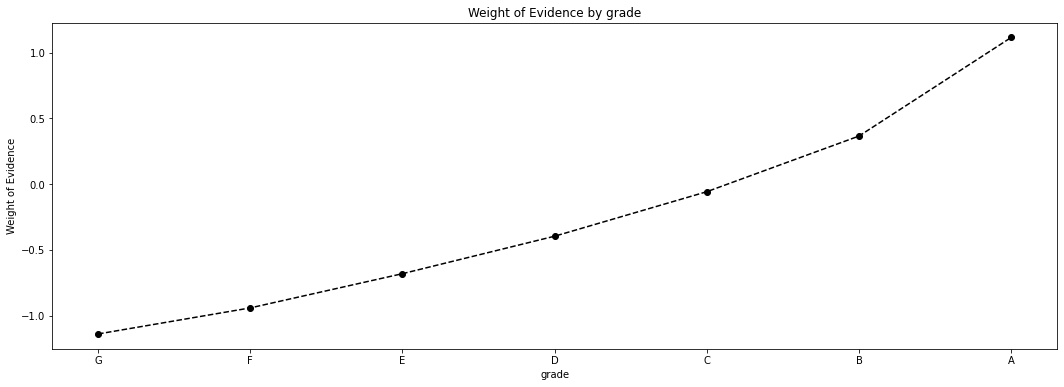

In [34]:
plot_by_woe(temp)

# Feature Engineering: Discrete class reduction

In [35]:
# home_ownership
col = 'home_ownership'
# plot the WoE to make decision
temp = WoE_IV_discrete(X_train, col , Y_train)

temp

,home_ownership,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,NONE,33,0.787879,0.000088,26.0,7.0,0.000078,0.000172,-0.786550,NaN,NaN,7.359516e-05,inf
1,OTHER,153,0.790850,0.000410,121.0,32.0,0.000364,0.000785,-0.768682,0.000286,0.017868,3.238350e-04,inf
2,RENT,150454,0.873948,0.403332,131489.0,18965.0,0.395710,0.465490,-0.162409,0.395346,0.606273,1.133284e-02,inf
3,OWN,33427,0.890956,0.089610,29782.0,3645.0,0.089628,0.089465,0.001811,0.306083,0.164220,2.937771e-07,inf
4,MORTGAGE,188960,0.904250,0.506557,170867.0,18093.0,0.514217,0.444087,0.146624,0.424589,0.144813,1.028265e-02,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.514214,inf,inf,inf


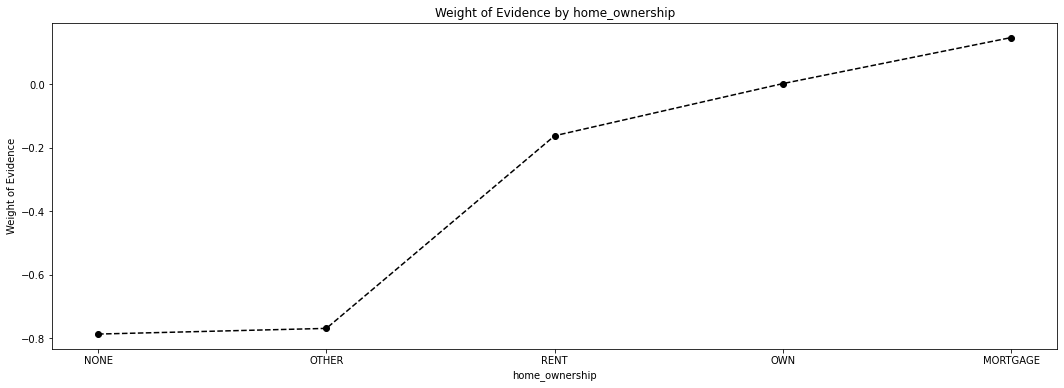

In [36]:
plot_by_woe(temp)

In [37]:
## decision: combine ANY, NONE and OTHER with RENT
data[col] = data[col].replace(
    ['RENT', 'OTHER', 'NONE', 'ANY'],
    'RENT_OTHER_NONE_ANY')

X_train[col] = X_train[col].replace(
    ['RENT', 'OTHER', 'NONE', 'ANY'],
    'RENT_OTHER_NONE_ANY')

In [38]:
data[col].unique()

array(['RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'], dtype=object)

In [39]:
use = True
# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append(ref[2])

In [40]:
# addr_state
col = 'addr_state'
# plot the WoE to make decision
temp = WoE_IV_discrete(X_train, col, Y_train)

temp

,addr_state,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,NE,12,0.416667,0.000032,5.0,7.0,0.000015,0.000172,-2.435209,NaN,NaN,3.817569e-04,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.894764,0.000015,1.540445,3.895759e-05,inf
2,NV,5230,0.865010,0.014020,4524.0,706.0,0.013615,0.017329,-0.241200,0.013585,0.653564,8.957630e-04,inf
3,HI,1993,0.868038,0.005343,1730.0,263.0,0.005206,0.006455,-0.215014,0.008408,0.026186,2.685301e-04,inf
4,FL,25316,0.874506,0.067866,22139.0,3177.0,0.066626,0.077978,-0.157333,0.061420,0.057681,1.786071e-03,inf
5,ID,8,0.875000,0.000021,7.0,1.0,0.000021,0.000025,-0.152826,0.066605,0.004507,5.316075e-07,inf
6,AL,4646,0.876238,0.012455,4071.0,575.0,0.012251,0.014113,-0.141463,0.012230,0.011364,2.633618e-04,inf
7,NY,32246,0.882621,0.086444,28461.0,3785.0,0.085652,0.092902,-0.081248,0.073401,0.060215,5.890097e-04,inf
8,NM,2070,0.884541,0.005549,1831.0,239.0,0.005510,0.005866,-0.062583,0.080142,0.018665,2.227118e-05,inf
9,OK,3281,0.884791,0.008796,2903.0,378.0,0.008736,0.009278,-0.060131,0.003226,0.002452,3.255751e-05,inf


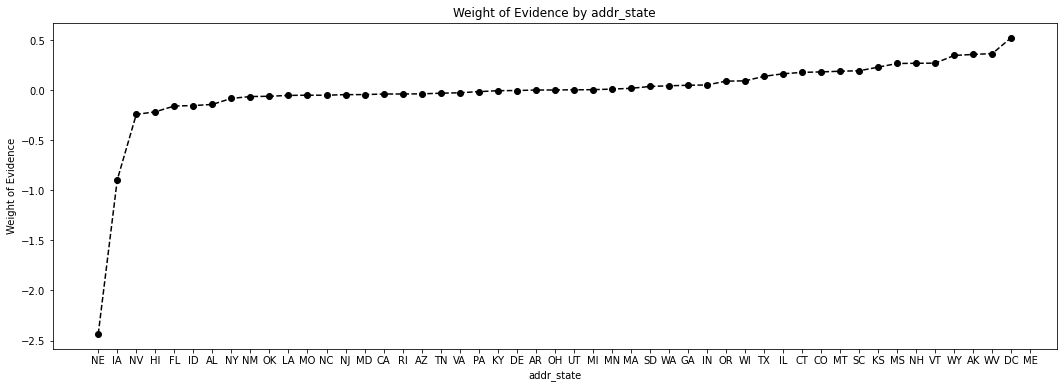

In [41]:
plot_by_woe(temp)

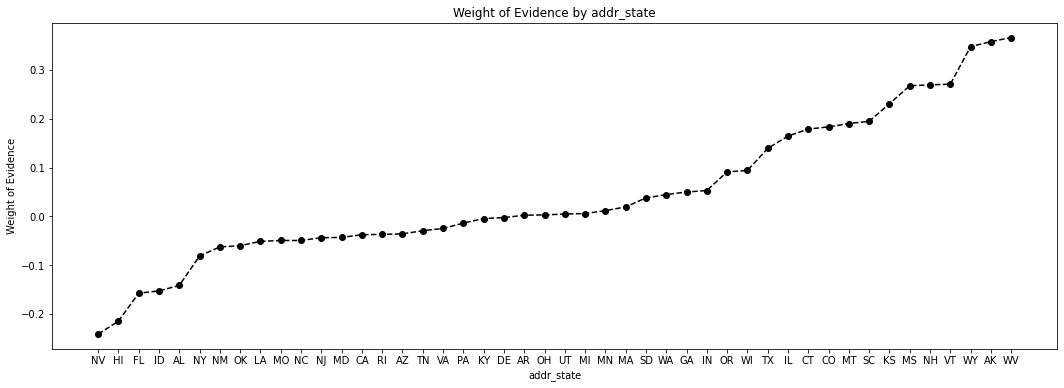

In [42]:
plot_by_woe(temp.iloc[2: -2, :])

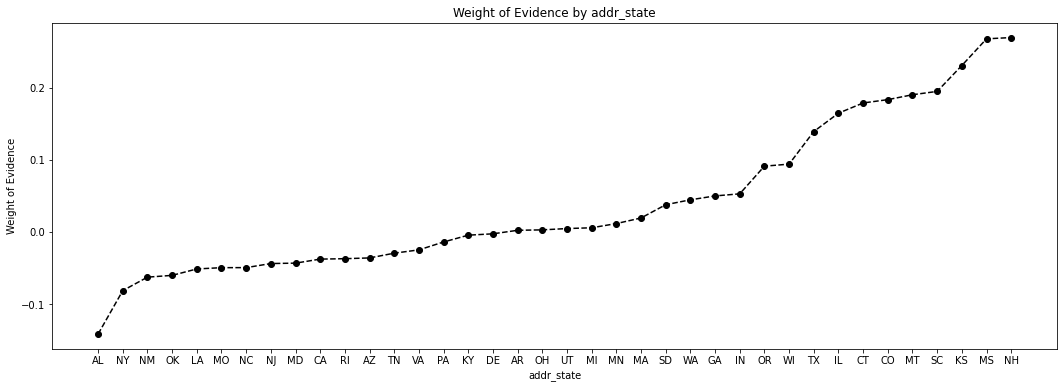

In [43]:
plot_by_woe(temp.iloc[6: -6, :])

In [44]:
## decision
## ND has 0 row, add it in NE, to use the most conservatively guess

group = [["ND", "NE", "IA", "NV" ,"FL", "HI", "AL"], 
         ["NM","VA"],
         ['OK','TN','MO','LA','MD','NC'],
         ['UT','KY','AZ','NJ'],
         ['AR','MI','PA','OH','MN'],
         ['RI','MA','DE','SD','IN'],
         ['GA','WA','OR'],
         ['WI','MT'],
         ['IL','CT'],
         ['KS','SC','CO','VT','AK','MS'],
         ['WV','NH','WY','DC','ME','ID']
        ]

for g in group:
    data[col] = data[col].replace(
    g,
    '_'.join(g))
    
    X_train[col] = X_train[col].replace(
    g,
    '_'.join(g))

In [45]:
data[col].unique()

array(['UT_KY_AZ_NJ', 'GA_WA_OR', 'IL_CT', 'CA', 'OK_TN_MO_LA_MD_NC',
       'TX', 'NM_VA', 'ND_NE_IA_NV_FL_HI_AL', 'NY', 'AR_MI_PA_OH_MN',
       'KS_SC_CO_VT_AK_MS', 'RI_MA_DE_SD_IN', 'WI_MT',
       'WV_NH_WY_DC_ME_ID'], dtype=object)

In [46]:
## ND has 0 rows in train, add it in NE, to use the most conservatively guess
idx = data[col].isin(["ND"])
data[col][idx]
data[col][idx] = '_'.join(["ND", "NE", "IA", "NV" ,"FL", "HI", "AL"])


<ipython-input-46-796d11d9da5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][idx] = '_'.join(["ND", "NE", "IA", "NV" ,"FL", "HI", "AL"])


In [47]:
data[col].unique()

array(['UT_KY_AZ_NJ', 'GA_WA_OR', 'IL_CT', 'CA', 'OK_TN_MO_LA_MD_NC',
       'TX', 'NM_VA', 'ND_NE_IA_NV_FL_HI_AL', 'NY', 'AR_MI_PA_OH_MN',
       'KS_SC_CO_VT_AK_MS', 'RI_MA_DE_SD_IN', 'WI_MT',
       'WV_NH_WY_DC_ME_ID'], dtype=object)

In [48]:
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append(ref[2])

In [49]:
# verification_status
col = 'verification_status'
# plot the WoE to make decision
temp = WoE_IV_discrete(X_train, col, Y_train)

temp

,verification_status,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,Verified,134501,0.872841,0.360565,117398.0,17103.0,0.353304,0.419788,-0.172421,NaN,NaN,0.011463,0.02035
1,Source Verified,119732,0.896252,0.320973,107310.0,12422.0,0.322945,0.304894,0.057516,0.030359,0.229937,0.001038,0.02035
2,Not Verified,118795,0.905577,0.318461,107578.0,11217.0,0.323751,0.275318,0.162049,0.000807,0.104533,0.007849,0.02035


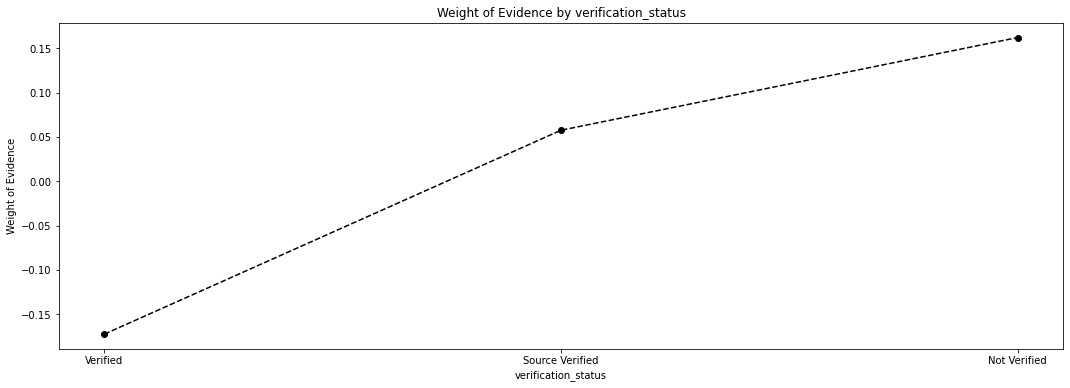

In [50]:
plot_by_woe(temp)

In [51]:
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append(ref[2])

In [52]:
# purpose
col = 'purpose'
# plot the WoE to make decision
temp = WoE_IV_discrete(X_train, col, Y_train)

temp

,purpose,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,small_business,5584,0.783309,0.014969,4374.0,1210.0,0.013163,0.029699,-0.813679,NaN,NaN,0.013455,0.036711
1,educational,335,0.794030,0.000898,266.0,69.0,0.000801,0.001694,-0.749347,0.012363,0.064332,0.000669,0.036711
2,renewable_energy,283,0.844523,0.000759,239.0,44.0,0.000719,0.001080,-0.406463,0.000081,0.342884,0.000147,0.036711
3,moving,2408,0.847591,0.006455,2041.0,367.0,0.006142,0.009008,-0.382903,0.005423,0.023559,0.001097,0.036711
4,other,18940,0.860771,0.050774,16303.0,2637.0,0.049063,0.064724,-0.277029,0.042921,0.105874,0.004339,0.036711
5,house,1847,0.863021,0.004951,1594.0,253.0,0.004797,0.006210,-0.258124,0.044266,0.018905,0.000365,0.036711
6,medical,3673,0.864688,0.009846,3176.0,497.0,0.009558,0.012199,-0.243949,0.004761,0.014175,0.000644,0.036711
7,wedding,1879,0.876530,0.005037,1647.0,232.0,0.004957,0.005694,-0.138763,0.004601,0.105186,0.000102,0.036711
8,vacation,2004,0.882735,0.005372,1769.0,235.0,0.005324,0.005768,-0.080152,0.000367,0.058611,0.000036,0.036711
9,debt_consolidation,219337,0.887110,0.587991,194576.0,24761.0,0.585568,0.607751,-0.037184,0.580244,0.042969,0.000825,0.036711


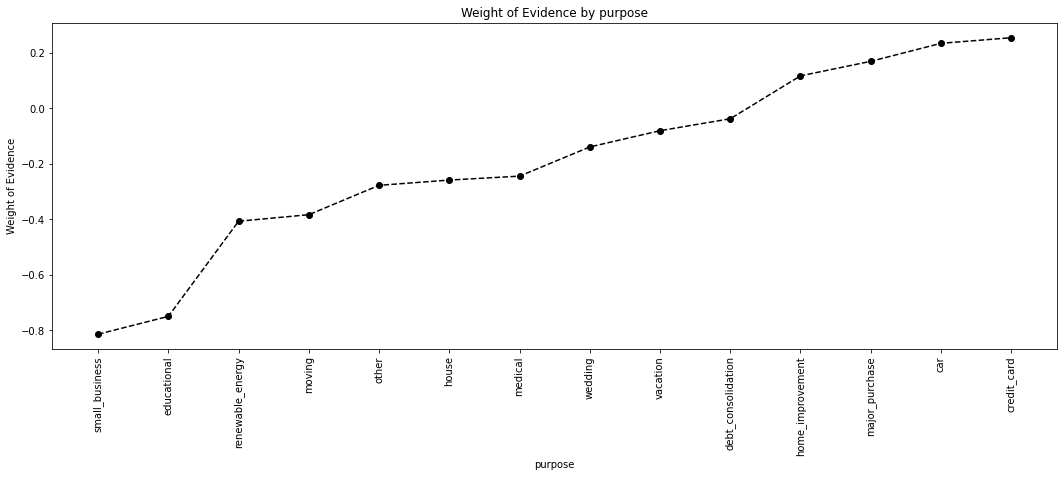

In [53]:
plot_by_woe(temp, 90)

In [54]:
group = [['educational','small_business','renewable_energy','moving'],
        ['other','wedding','medical','vacation','house'],
        ['major_purchase','car','home_improvement']]

group_abbr = [['educ','sm_b','ren_en','mov'],
        ['oth','med','vacation','house','wedd'],
        ['major_purch','car','home_impr']]


for i in range(0,3):
    data[col]= data[col].replace(
        group[i],
        '__'.join(group_abbr[i]))
    X_train[col]= X_train[col].replace(
        group[i],
        '__'.join(group_abbr[i]))

In [55]:
data[col].unique()

array(['credit_card', 'major_purch__car__home_impr',
       'educ__sm_b__ren_en__mov', 'oth__med__vacation__house__wedd',
       'debt_consolidation'], dtype=object)

In [56]:
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append(ref[2])

In [57]:
# initial_list_status
col = 'initial_list_status'
# plot the WoE to make decision
temp = WoE_IV_discrete(X_train, col, Y_train)

temp

,initial_list_status,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,f,242432,0.879739,0.649903,213277.0,29155.0,0.641848,0.715601,-0.108771,NaN,NaN,0.008022,0.025028
1,w,130596,0.911276,0.350097,119009.0,11587.0,0.358152,0.284399,0.230579,0.283695,0.33935,0.017006,0.025028


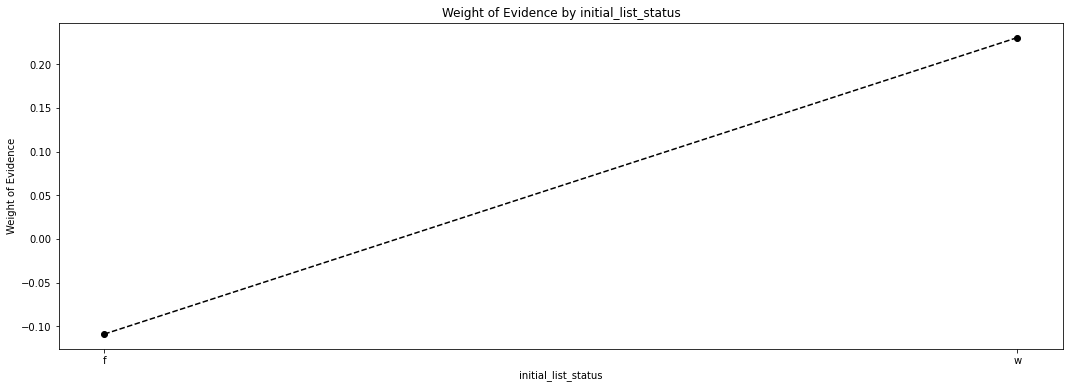

In [58]:
plot_by_woe(temp)

In [59]:
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append(ref[2])

# Feature Engineering: Categorize Continuous Variable

In [60]:
def  continuous_cutter(data, X_train, cuts, col, level = 1, dec = 0):
    #cuts should be a list (i) of lists or num (j); for each j, if j = list there are 2 num represent lr,ur
    #eg.cuts=[0,1,[2,5],[6,7],[8,10],10]

    if level==1000: level_cat ='K'
    else: level_cat=''

    temp_list = ['']*data.shape[0]
    train_temp_list = ['']*X_train.shape[0]
    for i in range(len(cuts)):

        # min
        if i == 0:
            #print('beg')
            if type(cuts[0]) !=list:
                lab = '<=' + str(cuts[0]) + level_cat
                temp_list = np.where(data[col]<=cuts[0]*level, lab, temp_list)
                train_temp_list = np.where(X_train[col]<=cuts[0]*level, lab, train_temp_list)
            else: 
                lr = cuts[i][0]
                ur = cuts[i][1]
                lab = '-'.join([str(round(lr,dec))+ level_cat , str(round(ur,dec))+ level_cat])
                temp_list = np.where(data[col].between(lr*level,ur*level), lab, temp_list)
                train_temp_list = np.where(X_train[col].between(lr*level,ur*level), lab, train_temp_list)

                lab = '<' + str(round(lr,dec)) + level_cat
                temp_list = np.where(data[col]<lr*level, lab, temp_list)
                train_temp_list = np.where(X_train[col]<lr*level, lab, train_temp_list)

        #max
        elif i==(len(cuts)-1):
            #print('max')
            if type(cuts[i]) !=list:
                lab = '>=' + str(round(cuts[-1],dec)) + level_cat
                temp_list = np.where(data[col]>=cuts[-1]*level, lab, temp_list)
                train_temp_list = np.where(X_train[col]>=cuts[-1]*level, lab, train_temp_list)
            else: 
                lr = cuts[i][0]
                ur = cuts[i][1]
                lab = '-'.join([str(round(lr,dec))+ level_cat , str(round(ur,dec))+ level_cat])
                temp_list = np.where(data[col].between(lr*level,ur*level), lab, temp_list)
                train_temp_list = np.where(X_train[col].between(lr*level,ur*level), lab, train_temp_list)

                lab = '>' + str(round(ur,dec)) + level_cat
                temp_list = np.where(data[col]>lr*level, lab, temp_list)
                train_temp_list = np.where(X_train[col]>lr*level, lab, train_temp_list)

        #between
        else:
            #print('bet')
            if type(cuts[i]) !=list:
                lab = '=' + str(cuts[i]) + level_cat
                temp_list = np.where(data[col]==cuts[i]*level, lab, temp_list)
                train_temp_list = np.where(X_train[col]==cuts[i]*level, lab, train_temp_list)
            else: 
                lr = cuts[i][0]
                ur = cuts[i][1]
                lab = '-'.join([str(round(lr,dec))+ level_cat , str(round(ur,dec))+ level_cat])
                temp_list = np.where(data[col].between(lr*level,ur*level), lab, temp_list)
                train_temp_list = np.where(X_train[col].between(lr*level,ur*level), lab, train_temp_list)

    # missing value
    temp_list = np.where(temp_list=='', 'Missing', temp_list)
    train_temp_list = np.where(train_temp_list=='', 'Missing', train_temp_list)
    
    return temp_list, train_temp_list

In [61]:
#term_int
col = 'term_int'
X_train[col].unique()

array([36, 60])

In [62]:
temp = WoE_IV_continuous(X_train, col, Y_train)
temp

,term_int,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,36,270316,0.902762,0.724653,244031.0,26285.0,0.7344,0.645157,0.129560,NaN,NaN,0.011562,0.037415
1,60,102712,0.859247,0.275347,88255.0,14457.0,0.2656,0.354843,-0.289685,0.468801,0.419245,0.025852,0.037415


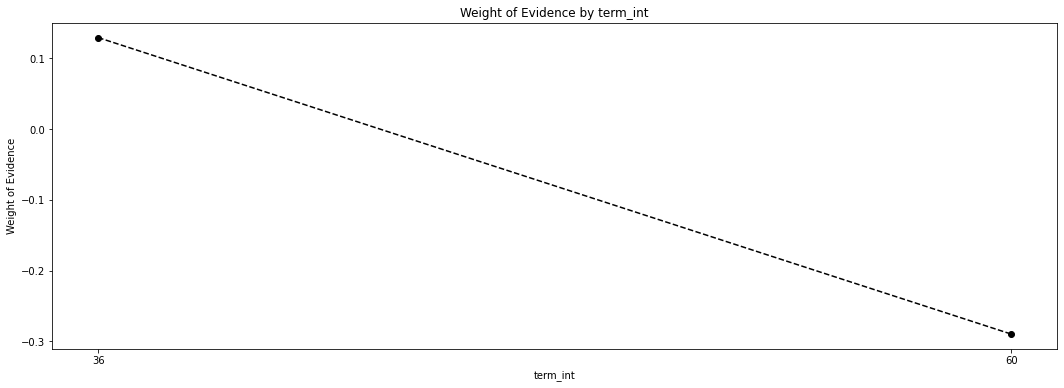

In [63]:
plot_by_woe(temp)

In [64]:
## only need categorize
data[col+'_numeric'] = data[col]
data[col] = data[col].astype(str)
X_train[col] = X_train[col].astype(str)

In [65]:
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [66]:
#emp_length_int
col = 'emp_length_int'
X_train[col].unique()


array([10.,  7.,  0.,  1.,  6.,  9.,  2.,  3.,  5.,  8.,  4.])

In [67]:
temp = WoE_IV_continuous(X_train, col, Y_train)
temp

,emp_length_int,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,0.0,45688,0.876357,0.122479,40039.0,5649.0,0.120496,0.138653,-0.140361,NaN,NaN,2.548591e-03,0.00633
1,1.0,23641,0.889472,0.063376,21028.0,2613.0,0.063283,0.064135,-0.013381,0.057213,0.126980,1.140641e-05,0.00633
2,2.0,32990,0.889936,0.088438,29359.0,3631.0,0.088355,0.089122,-0.008645,0.025072,0.004735,6.632653e-06,0.00633
3,3.0,29386,0.890560,0.078777,26170.0,3216.0,0.078757,0.078936,-0.002261,0.009597,0.006384,4.031364e-07,0.00633
4,4.0,22312,0.890821,0.059813,19876.0,2436.0,0.059816,0.059791,0.000419,0.018942,0.002680,1.050323e-08,0.00633
5,5.0,24672,0.884890,0.066140,21832.0,2840.0,0.065702,0.069707,-0.059164,0.005886,0.059583,2.369214e-04,0.00633
6,6.0,20915,0.884533,0.056068,18500.0,2415.0,0.055675,0.059275,-0.062665,0.010028,0.003501,2.256263e-04,0.00633
7,7.0,20964,0.887140,0.056200,18598.0,2366.0,0.055970,0.058073,-0.036883,0.000295,0.025782,7.756156e-05,0.00633
8,8.0,17913,0.888963,0.048021,15924.0,1989.0,0.047923,0.048819,-0.018541,0.008047,0.018342,1.662820e-05,0.00633
9,9.0,14320,0.888547,0.038389,12724.0,1596.0,0.038292,0.039173,-0.022747,0.009630,0.004206,2.004063e-05,0.00633


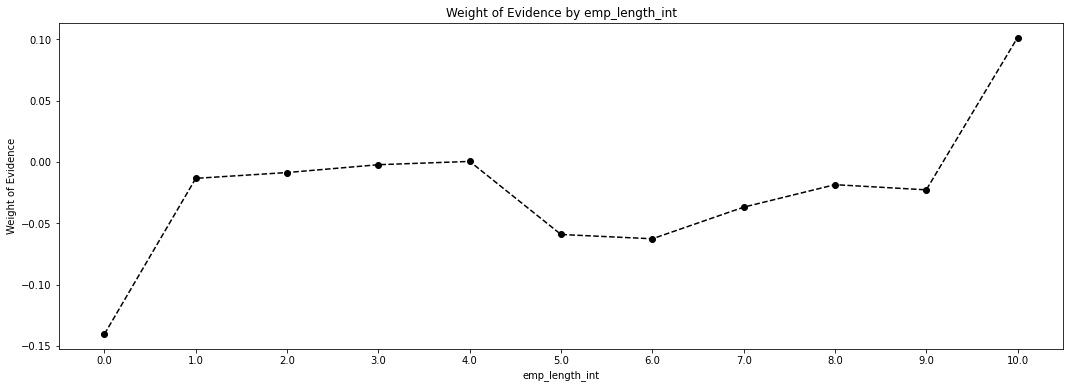

In [68]:
plot_by_woe(temp)

In [69]:
# cutting variable with cuts
cuts=[0,
      1,
     [2,5],
     [6,7],
     [8,10],
     10]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'>=10': 150049,
         '<=0': 57273,
         '=1': 29622,
         '2-5': 136766,
         '8-10': 40283,
         '6-7': 52292})

In [70]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [71]:
#mths_since_issue_d
col = 'mths_since_issue_d'
X_train[col].unique()
X_train['cut_temp'] = pd.cut(X_train[col], 50)
temp = WoE_IV_continuous(X_train, 'cut_temp', Y_train)
temp

,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(35.91, 37.8]",28265,0.942827,0.075772,26649.0,1616.0,0.080199,0.039664,0.704061,NaN,NaN,0.028539,0.115533
1,"(37.8, 39.6]",39395,0.928620,0.105609,36583.0,2812.0,0.110095,0.069020,0.466951,0.029896,0.237110,0.019180,0.115533
2,"(39.6, 41.4]",38655,0.919001,0.103625,35524.0,3131.0,0.106908,0.076849,0.330120,0.003187,0.136832,0.009923,0.115533
3,"(41.4, 43.2]",29024,0.909695,0.077806,26403.0,2621.0,0.079459,0.064332,0.211185,0.027449,0.118934,0.003195,0.115533
4,"(43.2, 45.0]",28330,0.900353,0.075946,25507.0,2823.0,0.076762,0.069290,0.102416,0.002696,0.108769,0.000765,0.115533
5,"(45.0, 46.8]",12210,0.899590,0.032732,10984.0,1226.0,0.033056,0.030092,0.093946,0.043706,0.008470,0.000278,0.115533
6,"(46.8, 48.6]",24568,0.896125,0.065861,22016.0,2552.0,0.066256,0.062638,0.056156,0.033200,0.037791,0.000203,0.115533
7,"(48.6, 50.4]",23030,0.889101,0.061738,20476.0,2554.0,0.061622,0.062687,-0.017144,0.004635,0.073299,0.000018,0.115533
8,"(50.4, 52.2]",20532,0.880674,0.055041,18082.0,2450.0,0.054417,0.060135,-0.099908,0.007205,0.082764,0.000571,0.115533
9,"(52.2, 54.0]",18367,0.866881,0.049238,15922.0,2445.0,0.047917,0.060012,-0.225080,0.006500,0.125172,0.002722,0.115533


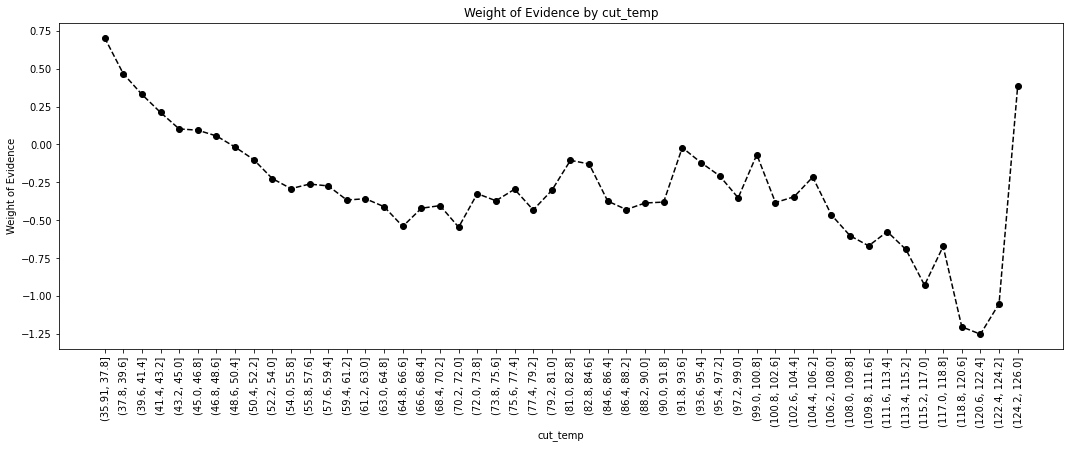

In [72]:
plot_by_woe(temp, 90)

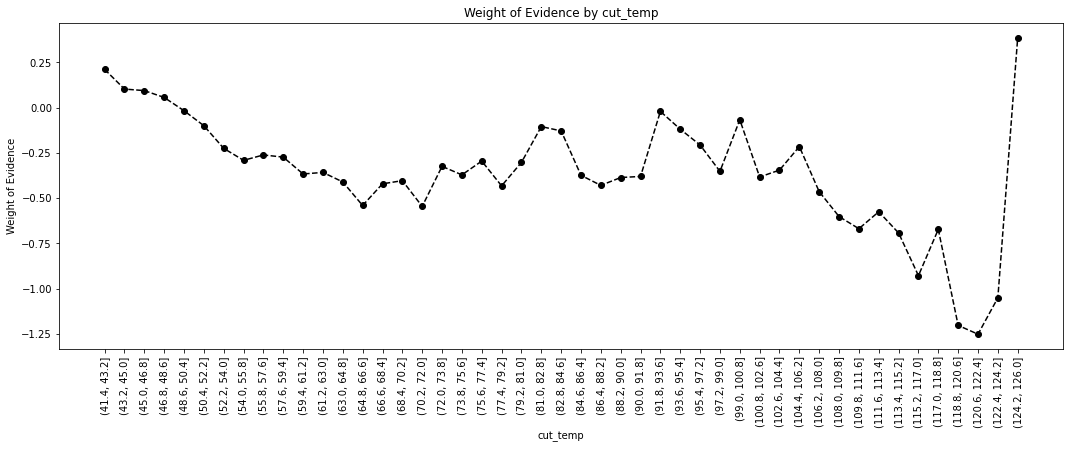

In [73]:
plot_by_woe(temp.iloc[3: , : ], 90)

In [74]:
# cutting variable with cuts
cuts=[38,
      [38.001,40],
     [40.001,42],
     [42.001,49],
     [49.001,53],
     [49.001,53],
     [53.001,65],
     [65.001,85],
     85.001]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'65.0-85': 42803,
         '>=85.0': 18255,
         '42.0-49': 115276,
         '49.0-53': 51685,
         '53.0-65': 88218,
         '<=38': 74143,
         '38.0-40': 29420,
         '40.0-42': 46485})

In [75]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [76]:
#int_rate
col = 'int_rate'
len(X_train[col].unique())

504

In [77]:
X_train['cut_temp'] = pd.cut(X_train[col], 50)
temp = WoE_IV_continuous(X_train, 'cut_temp', Y_train)
temp

,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(5.399, 5.833]",792,0.968434,0.002123,767.0,25.0,0.002308,0.000614,1.324874,NaN,NaN,0.002245,0.346141
1,"(5.833, 6.246]",8442,0.979626,0.022631,8270.0,172.0,0.024888,0.004222,1.774159,0.022580,0.449284,0.036666,0.346141
2,"(6.246, 6.658]",7838,0.970528,0.021012,7607.0,231.0,0.022893,0.005670,1.395670,0.001995,0.378489,0.024038,0.346141
3,"(6.658, 7.071]",1812,0.970751,0.004858,1759.0,53.0,0.005294,0.001301,1.403472,0.017599,0.007802,0.005604,0.346141
4,"(7.071, 7.484]",3125,0.976960,0.008377,3053.0,72.0,0.009188,0.001767,1.648477,0.003894,0.245005,0.012233,0.346141
5,"(7.484, 7.897]",12662,0.963513,0.033944,12200.0,462.0,0.036715,0.011340,1.174890,0.027527,0.473588,0.029814,0.346141
6,"(7.897, 8.31]",9743,0.950015,0.026119,9256.0,487.0,0.027856,0.011953,0.846027,0.008860,0.328863,0.013454,0.346141
7,"(8.31, 8.722]",6581,0.963683,0.017642,6342.0,239.0,0.019086,0.005866,1.179749,0.008770,0.333723,0.015596,0.346141
8,"(8.722, 9.135]",9538,0.939925,0.025569,8965.0,573.0,0.026980,0.014064,0.651461,0.007894,0.528288,0.008414,0.346141
9,"(9.135, 9.548]",6572,0.966829,0.017618,6354.0,218.0,0.019122,0.005351,1.273608,0.007858,0.622147,0.017539,0.346141


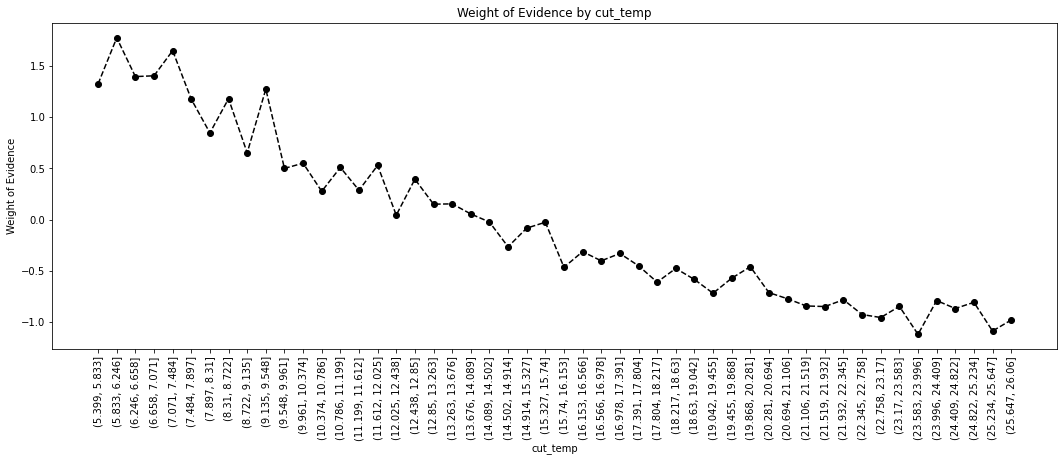

In [78]:
plot_by_woe(temp, 90)

In [79]:
# cutting variable with cuts
cuts=[[9.548, 12.025],
     [12.026,15.74],
     [15.741,20.281],
     20.282]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 3 )

# check
Counter(temp_list)

Counter({'9.548-12.025': 78161,
         '12.026-15.74': 162814,
         '15.741-20.281': 104504,
         '<9.548': 83978,
         '>=20.282': 36828})

In [80]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [81]:
#funded_amnt
col='funded_amnt'
X_train[col].unique()

array([12000, 33575,  5000, ..., 28225, 31150,   850])

In [82]:
X_train['cut_temp'] = pd.cut(X_train[col],50)
temp = WoE_IV_continuous(X_train, 'cut_temp', Y_train)
temp

,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(465.5, 1190.0]",1228,0.897394,0.003292,1102.0,126.0,0.003316,0.003093,0.069864,NaN,NaN,1.563466e-05,0.013481
1,"(1190.0, 1880.0]",3056,0.900524,0.008192,2752.0,304.0,0.008282,0.007462,0.104319,0.004966,0.034455,8.558688e-05,0.013481
2,"(1880.0, 2570.0]",5986,0.896091,0.016047,5364.0,622.0,0.016143,0.015267,0.055789,0.007861,0.048530,4.886634e-05,0.013481
3,"(2570.0, 3260.0]",7262,0.889838,0.019468,6462.0,800.0,0.019447,0.019636,-0.009654,0.003304,0.065443,1.821288e-06,0.013481
4,"(3260.0, 3950.0]",4783,0.892745,0.012822,4270.0,513.0,0.012850,0.012591,0.020357,0.006597,0.030011,5.271309e-06,0.013481
5,"(3950.0, 4640.0]",9061,0.890299,0.024290,8067.0,994.0,0.024277,0.024397,-0.004937,0.011427,0.025294,5.931496e-07,0.013481
6,"(4640.0, 5330.0]",15861,0.893765,0.042520,14176.0,1685.0,0.042662,0.041358,0.031048,0.018385,0.035985,4.049416e-05,0.013481
7,"(5330.0, 6020.0]",17175,0.904920,0.046042,15542.0,1633.0,0.046773,0.040081,0.154391,0.004111,0.123342,1.033101e-03,0.013481
8,"(6020.0, 6710.0]",6929,0.884110,0.018575,6126.0,803.0,0.018436,0.019709,-0.066794,0.028337,0.221185,8.505979e-05,0.013481
9,"(6710.0, 7400.0]",11715,0.896543,0.031405,10503.0,1212.0,0.031608,0.029748,0.060653,0.013172,0.127446,1.128223e-04,0.013481


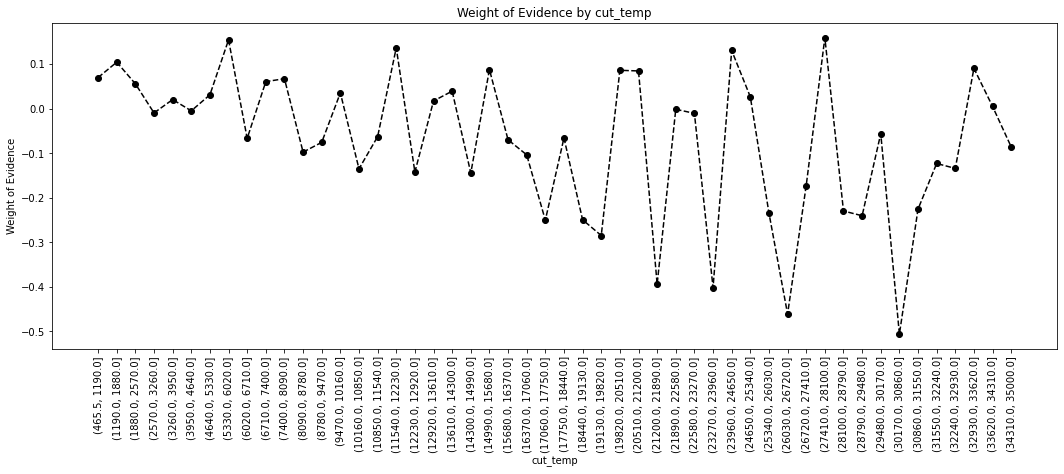

In [83]:
plot_by_woe(temp, 90)

In [84]:
## decision: WoE varying a lot, not to reduce the classes
# cutting variable with cuts

ij = np.round(np.linspace(start=500, stop=35000, num=50),0)
cuts = [[i,j] for i, j in zip(ij+ np.log(1.0001), ij[1:])]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'4724.0-5429.0': 20966,
         '1908.0-2612.0': 7730,
         '9653.0-10357.0': 37997,
         '2612.0-3316.0': 9066,
         '6837.0-7541.0': 17259,
         '5429.0-6133.0': 20927,
         '6133.0-6837.0': 8579,
         '11765.0-12469.0': 29538,
         '8949.0-9653.0': 15010,
         '500.0-1204.0': 2290,
         '3316.0-4020.0': 11929,
         '20214.0-20918.0': 2695,
         '20918.0-21622.0': 8810,
         '14582.0-15286.0': 26890,
         '8245.0-8949.0': 8842,
         '4020.0-4724.0': 5381,
         '31480.0-32184.0': 1869,
         '10357.0-11061.0': 11553,
         '12469.0-13173.0': 9179,
         '13878.0-14582.0': 13235,
         '25143.0-25847.0': 1489,
         '15990.0-16694.0': 15223,
         '17398.0-18102.0': 15768,
         '7541.0-8245.0': 19444,
         '13173.0-13878.0': 5476,
         '21622.0-22327.0': 4746,
         '15286.0-15990.0': 3967,
         '18806.0-19510.0': 6336,
         '23735.0-24439.0': 12041,
         '26551.0-27255.0'

In [85]:
data[col+'_numeric'] = data[col]
lgd_ead_feature.append([col+'_numeric'])
data[col]= temp_list
X_train[col]= train_temp_list
use = False

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])

In [86]:
#mths_since_earliest_cr_line
col = 'mths_since_earliest_cr_line'
len(X_train[col].unique())

516

In [87]:
X_train['cut_temp'] = pd.cut(X_train[col],50)
temp = WoE_IV_continuous(X_train, 'cut_temp', Y_train)
temp 

,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(-0.587, 11.74]",26,0.923077,0.000070,24.0,2.0,0.000072,0.000049,0.386170,NaN,NaN,8.935028e-06,0.015352
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015352
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015352
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015352
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015352
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015352
6,"(70.44, 82.18]",729,0.909465,0.001954,663.0,66.0,0.001995,0.001620,0.208384,NaN,NaN,7.821041e-05,0.015352
7,"(82.18, 93.92]",1939,0.896338,0.005198,1738.0,201.0,0.005230,0.004933,0.058449,0.003235,0.149935,1.735640e-05,0.015352
8,"(93.92, 105.66]",2773,0.851424,0.007434,2361.0,412.0,0.007105,0.010112,-0.352919,0.001875,0.411368,1.061260e-03,0.015352
9,"(105.66, 117.4]",5058,0.866943,0.013559,4385.0,673.0,0.013196,0.016519,-0.224537,0.006091,0.128382,7.459381e-04,0.015352


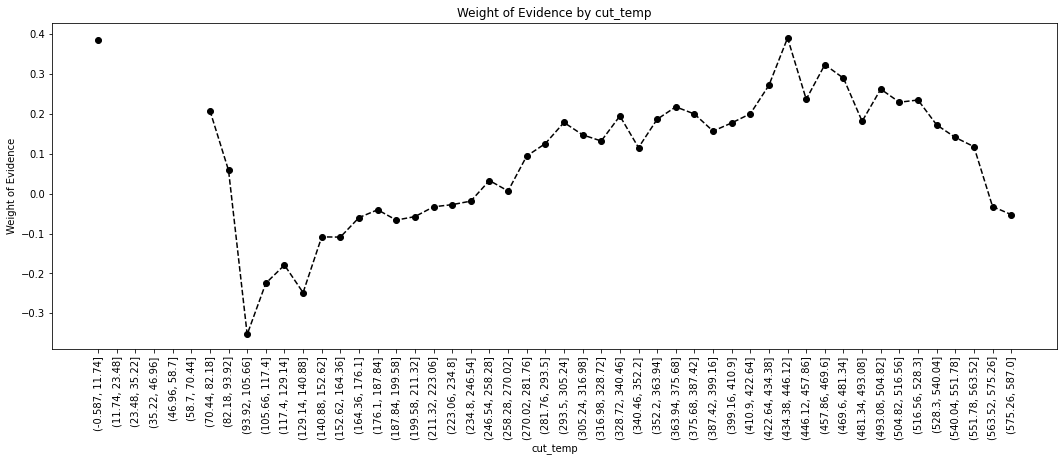

In [88]:
plot_by_woe(temp, 90)

In [89]:
cuts = [[140.001, 165],
        [165.001, 248],
        [248.001, 271],
        [271.001,353]
        ]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'>353': 139235,
         '165.0-248': 205435,
         '248.0-271': 43396,
         '140.0-165': 38909,
         '<140.0': 39310})

In [90]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [91]:
#delinq_2yrs
col = 'delinq_2yrs'
X_train[col].unique()

array([ 0.,  1.,  7.,  2.,  3., 12.,  4.,  8.,  5.,  6., 10.,  9., 11.,
       14., 13., 17., 21., 16., 15., 22., 18., 19.])

In [92]:
temp = WoE_IV_continuous(X_train, col, Y_train)
temp 

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/algorithms.py:1972: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,0.0,306371,0.890590,0.821308,272851.0,33520.0,0.821133,0.822738,-0.001953,NaN,NaN,3.134903e-06,inf
1,1.0,44931,0.893414,0.120449,40142.0,4789.0,0.120806,0.117545,0.027365,0.700327,0.029318,8.923789e-05,inf
2,2.0,13064,0.888166,0.035021,11603.0,1461.0,0.034919,0.035860,-0.026594,0.085887,0.053959,2.502723e-05,inf
3,3.0,4566,0.884363,0.012240,4038.0,528.0,0.012152,0.012960,-0.064328,0.022767,0.037734,5.193956e-05,inf
4,4.0,1908,0.895178,0.005115,1708.0,200.0,0.005140,0.004909,0.046024,0.007012,0.110352,1.064137e-05,inf
5,5.0,994,0.887324,0.002665,882.0,112.0,0.002654,0.002749,-0.035043,0.002486,0.081068,3.317415e-06,inf
6,6.0,522,0.896552,0.001399,468.0,54.0,0.001408,0.001325,0.060748,0.001246,0.095791,5.042770e-06,inf
7,7.0,279,0.896057,0.000748,250.0,29.0,0.000752,0.000712,0.055429,0.000656,0.005319,2.248611e-06,inf
8,8.0,141,0.893617,0.000378,126.0,15.0,0.000379,0.000368,0.029495,0.000373,0.025933,3.250656e-07,inf
9,9.0,97,0.896907,0.000260,87.0,10.0,0.000262,0.000245,0.064586,0.000117,0.035091,1.057648e-06,inf


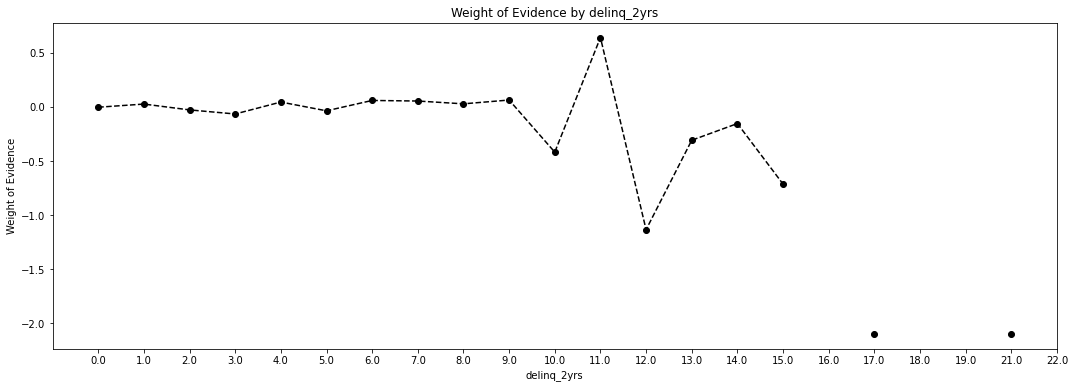

In [93]:
plot_by_woe(temp)

In [94]:
cuts = [0,
        [1,3],
        4
        ]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'<=0': 382983, '1-3': 78218, '>=4': 5084})

In [95]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [96]:
#inq_last_6mths
col = 'inq_last_6mths'
X_train[col].unique()

array([ 1.,  3.,  0.,  2.,  4.,  7.,  5., 11.,  6.,  8., 10., 15.,  9.,
       14., 18., 12., 32., 24., 25., 13., 16., 33., 19., 31., 17., 28.])

In [97]:
temp = WoE_IV_continuous(X_train, col, Y_train)
temp

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/algorithms.py:1972: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,inq_last_6mths,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,0.0,193227,0.908517,0.517996,175550.0,17677.0,0.528310,0.433877,0.196923,NaN,NaN,1.859610e-02,inf
1,1.0,104176,0.884494,0.279271,92143.0,12033.0,0.277300,0.295346,-0.063048,0.251010,0.259971,1.137762e-03,inf
2,2.0,46139,0.864648,0.123688,39894.0,6245.0,0.120059,0.153282,-0.244292,0.157241,0.181244,8.115958e-03,inf
3,3.0,20165,0.842301,0.054058,16985.0,3180.0,0.051116,0.078052,-0.423287,0.068944,0.178995,1.140189e-02,inf
4,4.0,5816,0.847146,0.015591,4927.0,889.0,0.014828,0.021820,-0.386348,0.036288,0.036939,2.701596e-03,inf
5,5.0,2218,0.824617,0.005946,1829.0,389.0,0.005504,0.009548,-0.550791,0.009323,0.164443,2.227175e-03,inf
6,6.0,924,0.781385,0.002477,722.0,202.0,0.002173,0.004958,-0.824979,0.003331,0.274188,2.297733e-03,inf
7,7.0,153,0.673203,0.000410,103.0,50.0,0.000310,0.001227,-1.376031,0.001863,0.551051,1.262179e-03,inf
8,8.0,97,0.597938,0.000260,58.0,39.0,0.000175,0.000957,-1.701855,0.000135,0.325825,1.332033e-03,inf
9,9.0,43,0.651163,0.000115,28.0,15.0,0.000084,0.000368,-1.474582,0.000090,0.227273,4.186423e-04,inf


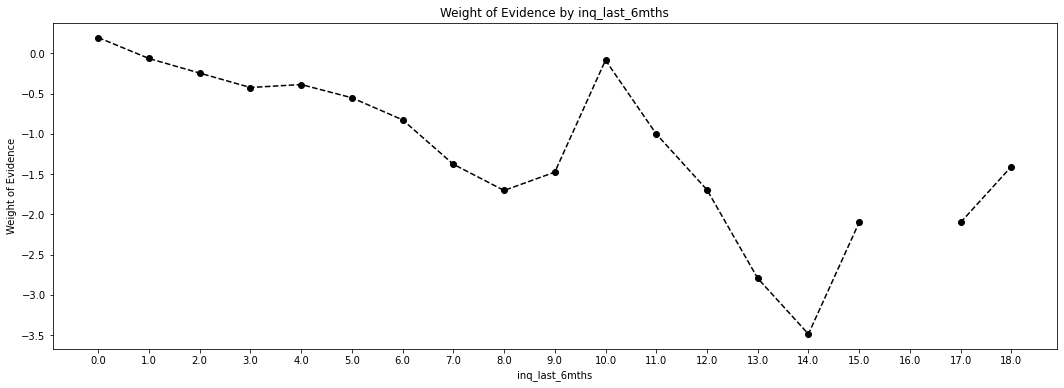

In [98]:
plot_by_woe(temp)

In [99]:
cuts = [0,
        [1,2],
        [3,6],
        7
       ]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'1-2': 187973, '3-6': 36323, '<=0': 241527, '>=7': 462})

In [100]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [101]:
#open_acc

col = 'open_acc'
data[col].unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47.,  0., 40., 45., 49., 53., 51., 43., 62.,
       48., 50., 52., 54., 76., 58., 55., 84., 75., 61.])

In [102]:
temp = WoE_IV_continuous(X_train, col, Y_train)
temp

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/algorithms.py:1972: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,open_acc,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,0.0,33,0.818182,0.000088,27.0,6.0,0.000081,0.000147,-0.594659,NaN,NaN,3.925516e-05,inf
1,1.0,117,0.871795,0.000314,102.0,15.0,0.000307,0.000368,-0.181814,0.000226,0.412845,1.112810e-05,inf
2,2.0,1418,0.844852,0.003801,1198.0,220.0,0.003605,0.005400,-0.403955,0.003298,0.222141,7.248999e-04,inf
3,3.0,4319,0.866173,0.011578,3741.0,578.0,0.011258,0.014187,-0.231202,0.007653,0.172753,6.770664e-04,inf
4,4.0,10099,0.890583,0.027073,8994.0,1105.0,0.027067,0.027122,-0.002024,0.015809,0.229178,1.110152e-07,inf
5,5.0,17312,0.890538,0.046409,15417.0,1895.0,0.046397,0.046512,-0.002485,0.019330,0.000460,2.867708e-07,inf
6,6.0,24691,0.891904,0.066191,22022.0,2669.0,0.066274,0.065510,0.011602,0.019877,0.014086,8.868685e-06,inf
7,7.0,30126,0.891456,0.080761,26856.0,3270.0,0.080822,0.080261,0.006963,0.014548,0.004639,3.904610e-06,inf
8,8.0,33628,0.891757,0.090149,29988.0,3640.0,0.090248,0.089343,0.010077,0.009426,0.003114,9.118393e-06,inf
9,9.0,35102,0.890092,0.094100,31244.0,3858.0,0.094027,0.094693,-0.007058,0.003780,0.017135,4.700712e-06,inf


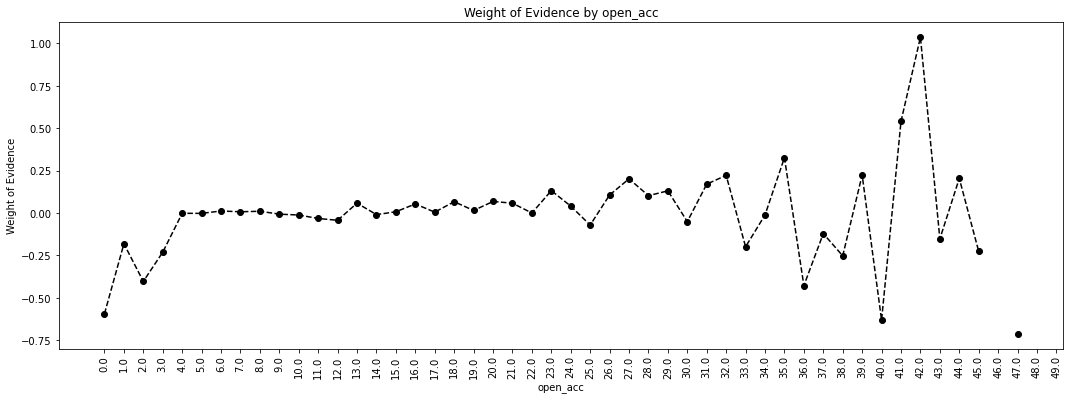

In [103]:
plot_by_woe(temp,90)

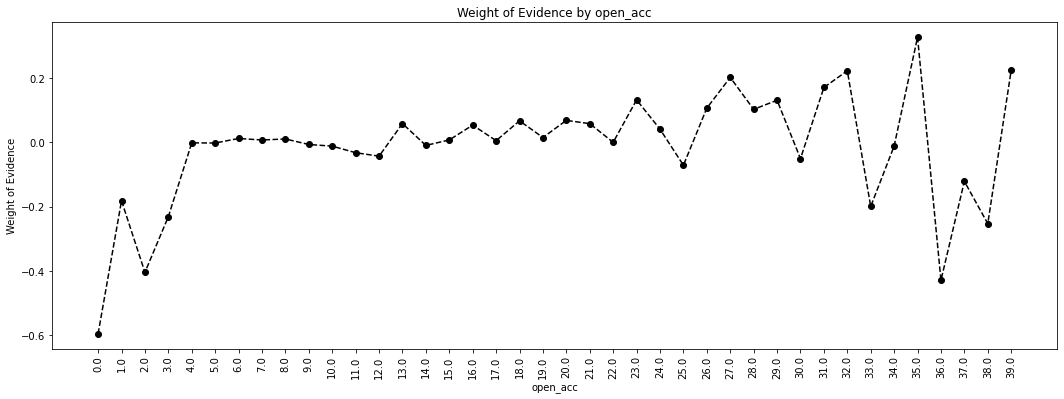

In [104]:
plot_by_woe(temp.iloc[ : 40, :], 90)

In [105]:
cuts = [0,
        [1,3],
        [4,12],
        [13,17],
        [18,22],
        [23,25],
        [26,30],
        31
       ]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'1-3': 7432,
         '4-12': 304692,
         '13-17': 104971,
         '18-22': 35556,
         '26-30': 4255,
         '23-25': 7543,
         '>=31': 1800,
         '<=0': 36})

In [106]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [107]:
#pub_rec
col = 'pub_rec'
X_train[col].unique()

array([ 1.,  0.,  7.,  2.,  3.,  5.,  4.,  6.,  8.,  9., 21., 10., 15.,
       40., 11., 13., 12., 63., 34., 54., 17., 14., 18.])

In [108]:
temp = WoE_IV_continuous(X_train, col, Y_train)
temp

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/algorithms.py:1972: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,pub_rec,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,0.0,323969,0.889820,0.868484,288274.0,35695.0,0.867548,0.876123,-0.009836,NaN,NaN,0.000084,inf
1,1.0,42436,0.895702,0.113761,38010.0,4426.0,0.114389,0.108635,0.051616,0.753158,0.061452,0.000297,inf
2,2.0,4467,0.902619,0.011975,4032.0,435.0,0.012134,0.010677,0.127935,0.102255,0.076319,0.000186,inf
3,3.0,1289,0.915438,0.003456,1180.0,109.0,0.003551,0.002675,0.283185,0.008583,0.155250,0.000248,inf
4,4.0,425,0.898824,0.001139,382.0,43.0,0.001150,0.001055,0.085484,0.002402,0.197701,0.000008,inf
5,5.0,228,0.912281,0.000611,208.0,20.0,0.000626,0.000491,0.243069,0.000524,0.157585,0.000033,inf
6,6.0,102,0.931373,0.000273,95.0,7.0,0.000286,0.000172,0.509230,0.000340,0.266161,0.000058,inf
7,7.0,50,0.920000,0.000134,46.0,4.0,0.000138,0.000098,0.343610,0.000147,0.165620,0.000014,inf
8,8.0,21,0.952381,0.000056,20.0,1.0,0.000060,0.000025,0.896996,0.000078,0.553385,0.000032,inf
9,9.0,11,0.818182,0.000029,9.0,2.0,0.000027,0.000049,-0.594659,0.000033,1.491655,0.000013,inf


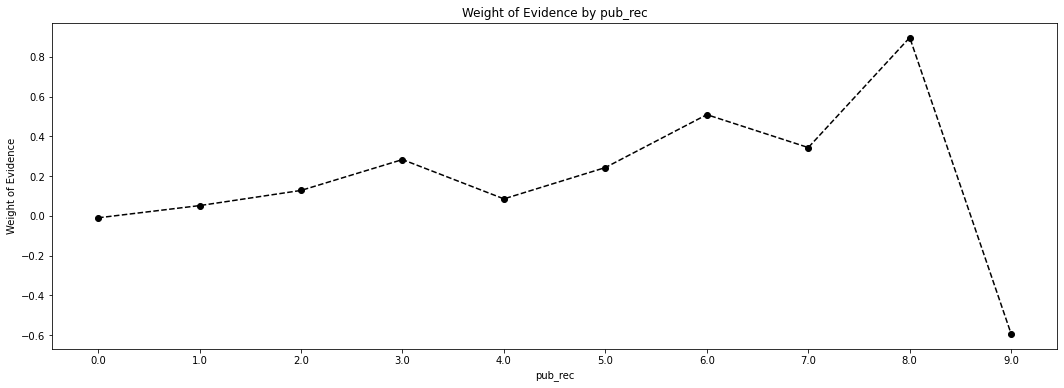

In [109]:
plot_by_woe(temp)

In [110]:
cuts=[[0,2],
     [3,4],
     5]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'0-2': 463597, '3-4': 2131, '>=5': 557})

In [111]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [112]:
#total_acc
col = 'total_acc'
len(X_train[col].unique())

111

In [113]:
X_train['cut_temp'] = pd.cut(X_train[col], 50)
temp = WoE_IV_continuous(X_train, 'cut_temp', Y_train)
temp

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/algorithms.py:1972: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(-0.156, 3.12]",447,0.805369,0.001198,360.0,87.0,0.001083,0.002135,-0.678541,NaN,NaN,7.138142e-04,inf
1,"(3.12, 6.24]",6001,0.863023,0.016087,5179.0,822.0,0.015586,0.020176,-0.258110,0.014503,0.420431,1.184664e-03,inf
2,"(6.24, 9.36]",14931,0.872011,0.040026,13020.0,1911.0,0.039183,0.046905,-0.179877,0.023597,0.078233,1.388971e-03,inf
3,"(9.36, 12.48]",25303,0.878552,0.067831,22230.0,3073.0,0.066900,0.075426,-0.119948,0.027717,0.059928,1.022636e-03,inf
4,"(12.48, 15.6]",33663,0.883403,0.090243,29738.0,3925.0,0.089495,0.096338,-0.073677,0.022595,0.046271,5.041538e-04,inf
5,"(15.6, 18.72]",38923,0.888575,0.104343,34586.0,4337.0,0.104085,0.106450,-0.022470,0.014590,0.051207,5.314956e-05,inf
6,"(18.72, 21.84]",40622,0.886982,0.108898,36031.0,4591.0,0.108434,0.112685,-0.038455,0.004349,0.015984,1.634711e-04,inf
7,"(21.84, 24.96]",39889,0.893279,0.106933,35632.0,4257.0,0.107233,0.104487,0.025943,0.001201,0.064398,7.124318e-05,inf
8,"(24.96, 28.08]",47333,0.896288,0.126889,42424.0,4909.0,0.127673,0.120490,0.057907,0.020440,0.031965,4.159629e-04,inf
9,"(28.08, 31.2]",29645,0.895227,0.079471,26539.0,3106.0,0.079868,0.076236,0.046543,0.047805,0.011364,1.690500e-04,inf


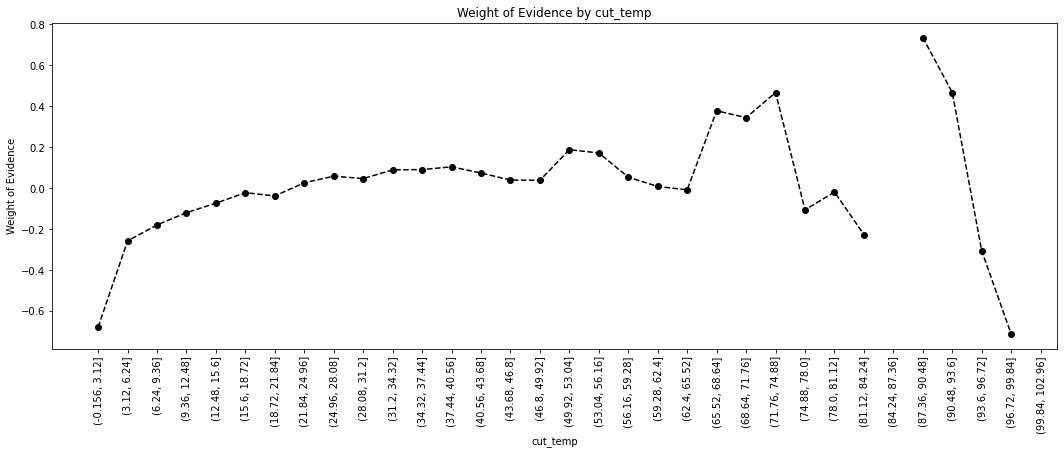

In [114]:
plot_by_woe(temp,90)

In [115]:
cuts=[27,
     [28,51],
     52]
temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'<=27': 295232, '28-51': 158296, '>=52': 12757})

In [116]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [117]:
#acc_now_delinq
col ='acc_now_delinq'

len(X_train[col].unique())

5

In [118]:
temp = WoE_IV_continuous(X_train, col, Y_train)
temp

,acc_now_delinq,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,0.0,371619,0.890767,0.996223,331026.0,40593.0,0.996208,0.996343,-0.000135,NaN,NaN,1.822666e-08,inf
1,1.0,1326,0.893665,0.003555,1185.0,141.0,0.003566,0.003461,0.030002,0.992642,0.030137,3.162258e-06,inf
2,2.0,72,0.902778,0.000193,65.0,7.0,0.000196,0.000172,0.129741,0.003371,0.099739,3.088053e-06,inf
3,3.0,8,0.875000,0.000021,7.0,1.0,0.000021,0.000025,-0.152826,0.000175,0.282567,5.316075e-07,inf
4,4.0,3,1.000000,0.000008,3.0,0.0,0.000009,0.000000,inf,0.000012,inf,inf,inf


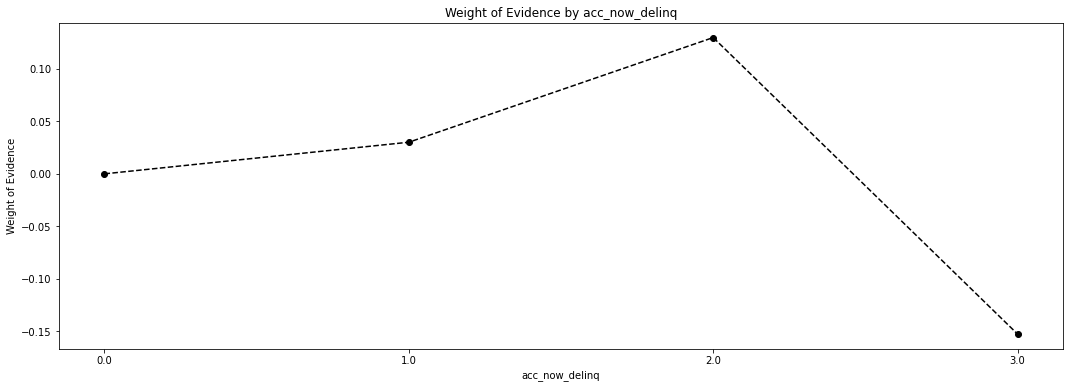

In [119]:
plot_by_woe(temp)

In [120]:
cuts=[0,
     1]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'<=0': 464553, '>=1': 1732})

In [121]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [122]:
#total_rev_hi_lim
col = 'total_rev_hi_lim'
len(X_train[col].unique())

12734

In [123]:
X_train['cut_temp'] = pd.cut(X_train[col], 2000)
temp = WoE_IV_continuous(X_train, 'cut_temp', Y_train)
temp

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/algorithms.py:1972: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(-9999.999, 5000.0]",19472,0.865756,0.052200,16858.0,2614.0,0.050733,0.064160,-0.234793,NaN,NaN,0.003152,inf
1,"(5000.0, 9999.999]",52748,0.875009,0.141405,46155.0,6593.0,0.138901,0.161823,-0.152740,0.088168,0.082053,0.003501,inf
2,"(9999.999, 14999.998]",59408,0.880454,0.159259,52306.0,7102.0,0.157413,0.174316,-0.102002,0.018511,0.050738,0.001724,inf
3,"(14999.998, 19999.998]",51274,0.878086,0.137453,45023.0,6251.0,0.135495,0.153429,-0.124305,0.021918,0.022303,0.002229,inf
4,"(19999.998, 24999.997]",41599,0.888026,0.111517,36941.0,4658.0,0.111172,0.114329,-0.028001,0.024322,0.096304,0.000088,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


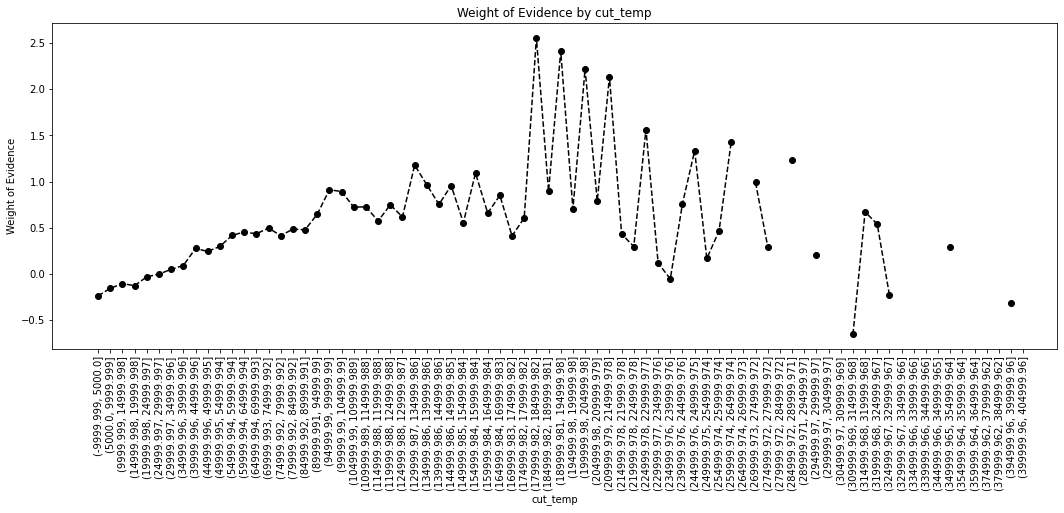

In [124]:
plot_by_woe(temp[temp.iloc[:,1]>5], 90)

In [125]:
cuts=[5,
     [5.0001,10],
     [10.0001,20],
     [20.00001,30],
     [30.00001,40],
     [40.00001,55],
     [55.00001,95],
     95]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1000, dec = 0 )

# check
Counter(temp_list)

Counter({'<=5K': 28189,
         '5.0K-10K': 68374,
         '10.0K-20K': 136191,
         '20.0K-30K': 89827,
         '30.0K-40K': 54155,
         '55.0K-95K': 34576,
         '40.0K-55K': 43788,
         '>=95K': 11185})

In [126]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [127]:
#installment
col = 'installment'
len(X_train[col].unique())

51392

In [128]:
X_train['cut_temp'] = pd.cut(X_train[col], 50)
temp = WoE_IV_continuous(X_train, 'cut_temp', Y_train)
temp

,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(14.356, 43.635]",1813,0.896304,0.004860,1625.0,188.0,0.004890,0.004614,0.058085,NaN,NaN,1.602918e-05,0.012657
1,"(43.635, 71.52]",4885,0.897851,0.013096,4386.0,499.0,0.013199,0.012248,0.074830,0.008309,0.016746,7.121370e-05,0.012657
2,"(71.52, 99.404]",6802,0.895472,0.018235,6091.0,711.0,0.018331,0.017451,0.049159,0.005131,0.025672,4.322592e-05,0.012657
3,"(99.404, 127.289]",9213,0.890481,0.024698,8204.0,1009.0,0.024690,0.024766,-0.003074,0.006359,0.052233,2.337300e-07,0.012657
4,"(127.289, 155.174]",10037,0.895088,0.026907,8984.0,1053.0,0.027037,0.025846,0.045065,0.002347,0.048140,5.369031e-05,0.012657
5,"(155.174, 183.059]",16791,0.895301,0.045013,15033.0,1758.0,0.045241,0.043150,0.047334,0.018204,0.002269,9.900341e-05,0.012657
6,"(183.059, 210.944]",17156,0.904465,0.045991,15517.0,1639.0,0.046698,0.040229,0.149113,0.001457,0.101779,9.646095e-04,0.012657
7,"(210.944, 238.828]",15022,0.899614,0.040270,13514.0,1508.0,0.040670,0.037013,0.094205,0.006028,0.054908,3.444509e-04,0.012657
8,"(238.828, 266.713]",18887,0.901043,0.050632,17018.0,1869.0,0.051215,0.045874,0.110132,0.010545,0.015926,5.881994e-04,0.012657
9,"(266.713, 294.598]",19958,0.890069,0.053503,17764.0,2194.0,0.053460,0.053851,-0.007289,0.002245,0.117421,2.850653e-06,0.012657


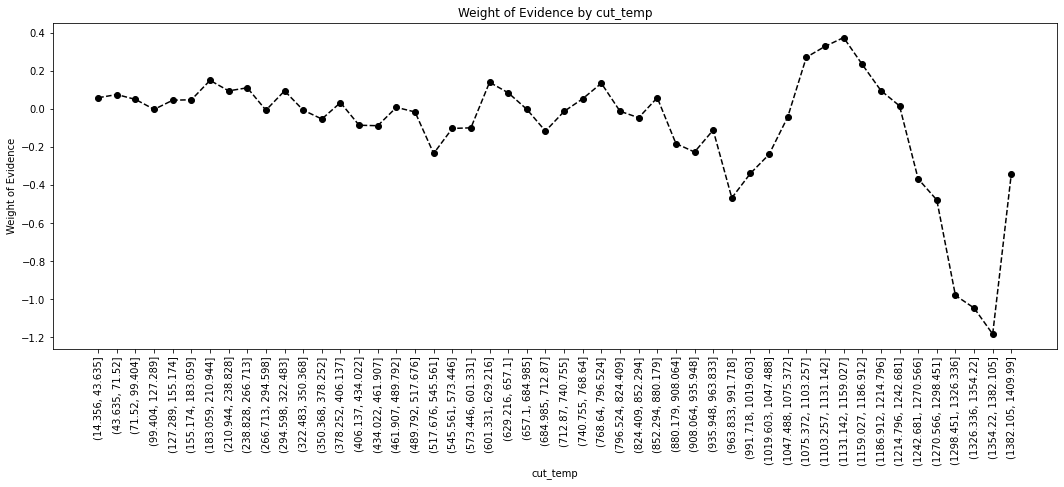

In [129]:
plot_by_woe(temp,90)

In [130]:
ij = np.round(np.linspace(start=14.356, stop=1409.99, num=50),0)
cuts = [[i,j] for i, j in zip(ij+ np.log(1.0001), ij[1:])]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'157.0-185.0': 20822,
         '43.0-71.0': 6061,
         '71.0-100.0': 9019,
         '328.0-356.0': 30385,
         '128.0-157.0': 13853,
         '100.0-128.0': 11354,
         '385.0-413.0': 22526,
         '299.0-328.0': 28156,
         '14.0-43.0': 2235,
         '185.0-214.0': 21918,
         '271.0-299.0': 24288,
         '470.0-499.0': 20850,
         '698.0-726.0': 6066,
         '499.0-527.0': 17264,
         '983.0-1011.0': 2131,
         '242.0-271.0': 25511,
         '442.0-470.0': 16635,
         '356.0-385.0': 24338,
         '812.0-840.0': 4486,
         '214.0-242.0': 19291,
         '413.0-442.0': 16300,
         '527.0-556.0': 14047,
         '556.0-584.0': 12700,
         '755.0-783.0': 6176,
         '641.0-669.0': 11261,
         '1097.0-1125.0': 1309,
         '840.0-869.0': 5035,
         '1125.0-1154.0': 1163,
         '783.0-812.0': 5902,
         '669.0-698.0': 10556,
         '584.0-612.0': 11357,
         '612.0-641.0': 11883,
         '926.0-954

In [131]:
data[col+'_numeric'] = data[col]
lgd_ead_feature.append([col+'_numeric'])
data[col]= temp_list
X_train[col]= train_temp_list

use = False

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])

In [132]:
#annual_inc
col = 'annual_inc'
len(X_train[col].unique())

26924

In [133]:
X_train['cut_temp'] = pd.cut(X_train[col], 50)
temp = WoE_IV_continuous(X_train,'cut_temp', Y_train)
temp
# the first bar since to big! seperate more bars

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/algorithms.py:1972: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(-5602.104, 151858.08]",356585,0.889059,0.955920,317025.0,39560.0,0.954073,0.970988,-0.017574,NaN,NaN,0.000297,inf
1,"(151858.08, 301820.16]",14800,0.927500,0.039675,13727.0,1073.0,0.041311,0.026336,0.450170,0.912762,0.467744,0.006741,inf
2,"(301820.16, 451782.24]",1119,0.931189,0.003000,1042.0,77.0,0.003136,0.001890,0.506355,0.038175,0.056186,0.000631,inf
3,"(451782.24, 601744.32]",297,0.949495,0.000796,282.0,15.0,0.000849,0.000368,0.835120,0.002287,0.328765,0.000401,inf
4,"(601744.32, 751706.4]",94,0.904255,0.000252,85.0,9.0,0.000256,0.000221,0.146690,0.000593,0.688430,0.000005,inf
5,"(751706.4, 901668.48]",62,0.903226,0.000166,56.0,6.0,0.000169,0.000147,0.134856,0.000087,0.011834,0.000003,inf
6,"(901668.48, 1051630.56]",26,0.961538,0.000070,25.0,1.0,0.000075,0.000025,1.120139,0.000093,0.985284,0.000057,inf
7,"(1051630.56, 1201592.64]",18,1.000000,0.000048,18.0,0.0,0.000054,0.000000,inf,0.000021,inf,inf,inf
8,"(1201592.64, 1351554.72]",6,0.833333,0.000016,5.0,1.0,0.000015,0.000025,-0.489299,0.000039,inf,0.000005,inf
9,"(1351554.72, 1501516.8]",6,1.000000,0.000016,6.0,0.0,0.000018,0.000000,inf,0.000003,inf,inf,inf


In [134]:
X_train['cut_temp'] = pd.cut(X_train[col], 300)
temp = WoE_IV_continuous(X_train,'cut_temp', Y_train)
temp


/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/algorithms.py:1972: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(-5602.104, 26889.68]",16279,0.849008,0.043640,13821.0,2458.0,0.041594,0.060331,-0.371895,NaN,NaN,0.006968,inf
1,"(26889.68, 51883.36]",113456,0.868575,0.304149,98545.0,14911.0,0.296567,0.365986,-0.210322,0.254973,0.161573,0.014600,inf
2,"(51883.36, 76877.04]",115111,0.890289,0.308585,102482.0,12629.0,0.308415,0.309975,-0.005045,0.011848,0.205277,0.000008,inf
3,"(76877.04, 101870.72]",66985,0.909233,0.179571,60905.0,6080.0,0.183291,0.149232,0.205574,0.125124,0.210619,0.007002,inf
4,"(101870.72, 126864.4]",30068,0.921312,0.080605,27702.0,2366.0,0.083368,0.058073,0.361567,0.099923,0.155993,0.009146,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,"(7375031.6, 7400025.28]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
296,"(7400025.28, 7425018.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
297,"(7425018.96, 7450012.64]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,NaN,NaN,inf,inf
298,"(7450012.64, 7475006.32]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


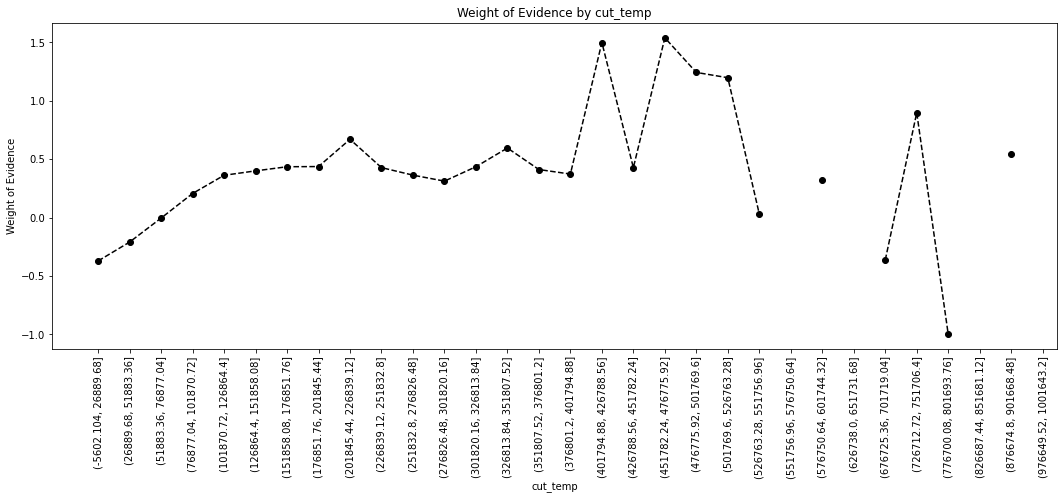

In [135]:
temp = temp[temp['n_obs']>10]
plot_by_woe(temp, 90)

In [136]:
cuts=[20,
     [20.00001,30],
     [30.00001,40],
     [20.00001,50],
     [50.00001,60],
     [60.00001,70],
     [70.00001,80],
     [80.00001,90],
     [90.00001,100],
     [100.00001,120],
     [120.00001,140],
     140]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1000, dec = 0 )

# check
Counter(temp_list)

Counter({'20.0K-50K': 150627,
         '<=20K': 7088,
         '70.0K-80K': 46883,
         '90.0K-100K': 28312,
         '100.0K-120K': 33012,
         '80.0K-90K': 35039,
         '50.0K-60K': 66514,
         '60.0K-70K': 54165,
         '>=140K': 30093,
         '120.0K-140K': 14552})

In [137]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [138]:
#mths_since_last_delinq
col ='mths_since_last_delinq'
len(X_train[col].unique())

140

In [139]:
X_train['cut_temp'] = pd.cut(X_train[col], 50)
temp = WoE_IV_continuous(X_train,'cut_temp', Y_train)
temp

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/algorithms.py:1972: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(-0.188, 3.76]",5367,0.871250,0.031078,4676.0,691.0,0.030359,0.037007,-0.198018,NaN,NaN,1.316462e-03,inf
1,"(3.76, 7.52]",11053,0.887904,0.064003,9814.0,1239.0,0.063718,0.066356,-0.040572,0.033359,0.157447,1.070393e-04,inf
2,"(7.52, 11.28]",13297,0.891178,0.076997,11850.0,1447.0,0.076937,0.077496,-0.007241,0.013219,0.033330,4.049084e-06,inf
3,"(11.28, 15.04]",13219,0.889477,0.076545,11758.0,1461.0,0.076339,0.078246,-0.024664,0.000597,0.017423,4.701610e-05,inf
4,"(15.04, 18.8]",9353,0.896076,0.054159,8381.0,972.0,0.054414,0.052057,0.044290,0.021925,0.068954,1.044087e-04,inf
5,"(18.8, 22.56]",11654,0.893856,0.067483,10417.0,1237.0,0.067633,0.066249,0.020673,0.013219,0.023617,2.860804e-05,inf
6,"(22.56, 26.32]",10851,0.894295,0.062833,9704.0,1147.0,0.063004,0.061429,0.025311,0.004629,0.004638,3.985797e-05,inf
7,"(26.32, 30.08]",10615,0.893453,0.061467,9484.0,1131.0,0.061575,0.060572,0.016427,0.001428,0.008884,1.648033e-05,inf
8,"(30.08, 33.84]",7601,0.898829,0.044014,6832.0,769.0,0.044357,0.041185,0.074205,0.017218,0.057778,2.354039e-04,inf
9,"(33.84, 37.6]",9696,0.901506,0.056145,8741.0,955.0,0.056751,0.051146,0.103992,0.012394,0.029787,5.828903e-04,inf


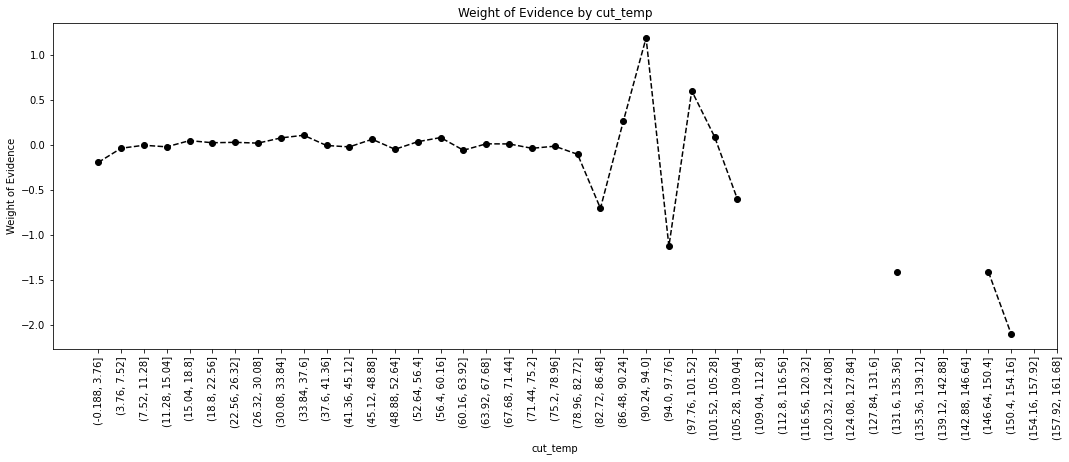

In [140]:
plot_by_woe(temp,90)

In [141]:
cuts=[[0,3],
     [4,30],
     [31,56],
     57]
temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'Missing': 250351,
         '31-56': 68586,
         '>=57': 40604,
         '4-30': 100119,
         '0-3': 6625})

In [142]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [143]:
#dti
col = 'dti'
len(X_train[col].unique())

3995

In [144]:
X_train['cut_temp'] = pd.cut(X_train[col], 100)
temp = WoE_IV_continuous(X_train,'cut_temp', Y_train)
temp

,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(-0.04, 0.4]",746,0.886059,0.002000,661.0,85.0,0.001989,0.002086,-0.047634,NaN,NaN,4.622825e-06,0.027204
1,"(0.4, 0.8]",778,0.919023,0.002086,715.0,63.0,0.002152,0.001546,0.330411,0.000163,0.378045,2.000459e-04,0.027204
2,"(0.8, 1.2]",888,0.898649,0.002381,798.0,90.0,0.002402,0.002209,0.083562,0.000250,0.246849,1.608768e-05,0.027204
3,"(1.2, 1.6]",1032,0.901163,0.002767,930.0,102.0,0.002799,0.002504,0.111475,0.000397,0.027913,3.291137e-05,0.027204
4,"(1.6, 2.0]",1195,0.896234,0.003204,1071.0,124.0,0.003223,0.003044,0.057330,0.000424,0.054145,1.029559e-05,0.027204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(37.991, 38.39]",203,0.886700,0.000544,180.0,23.0,0.000542,0.000565,-0.041274,0.000111,0.186941,9.421173e-07,0.027204
96,"(38.39, 38.79]",172,0.866279,0.000461,149.0,23.0,0.000448,0.000565,-0.230284,0.000093,0.189011,2.674042e-05,0.027204
97,"(38.79, 39.19]",193,0.865285,0.000517,167.0,26.0,0.000503,0.000638,-0.238839,0.000054,0.008555,3.238254e-05,0.027204
98,"(39.19, 39.59]",172,0.936047,0.000461,161.0,11.0,0.000485,0.000270,0.584773,0.000018,0.823612,1.254517e-04,0.027204


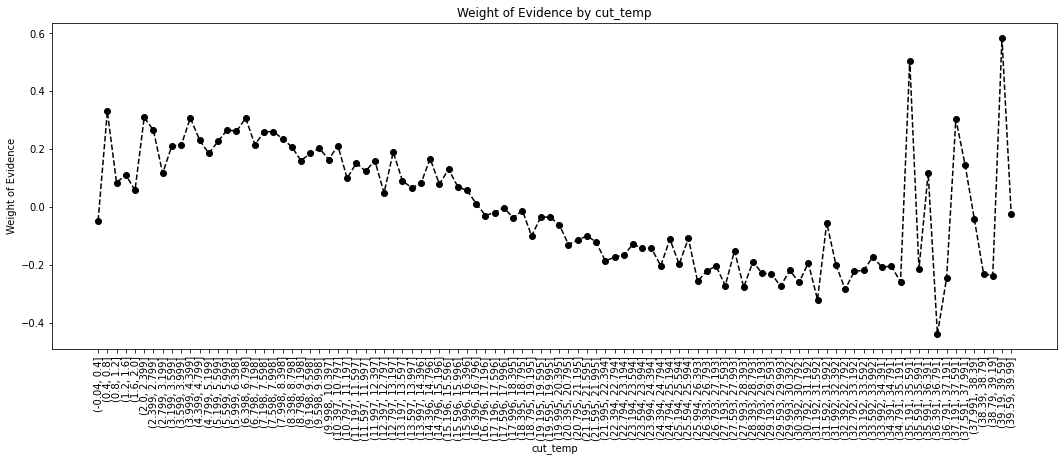

In [145]:
plot_by_woe(temp, 90)

In [146]:
# check for more detail
X_train_temp = X_train.loc[X_train[col] <= 35, : ]
X_train_temp['cut_temp'] = pd.cut(X_train[col], 50)
temp = WoE_IV_continuous(X_train_temp,'cut_temp', Y_train[X_train_temp.index])
temp

<ipython-input-146-b4ddebc32fdc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_temp['cut_temp'] = pd.cut(X_train[col], 50)


,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(-0.04, 0.8]",1524,0.902887,0.004117,1376.0,148.0,0.004173,0.003661,0.130843,NaN,NaN,0.000067,0.02532
1,"(0.8, 1.6]",1920,0.900000,0.005187,1728.0,192.0,0.005240,0.004750,0.098344,0.001068,0.032499,0.000048,0.02532
2,"(1.6, 2.399]",2528,0.907437,0.006829,2294.0,234.0,0.006957,0.005789,0.183850,0.001717,0.085507,0.000215,0.02532
3,"(2.399, 3.199]",3207,0.907390,0.008664,2910.0,297.0,0.008825,0.007347,0.183295,0.001868,0.000555,0.000271,0.02532
4,"(3.199, 3.999]",4101,0.909778,0.011079,3731.0,370.0,0.011315,0.009153,0.212048,0.002490,0.028752,0.000458,0.02532
5,"(3.999, 4.799]",5062,0.914263,0.013675,4628.0,434.0,0.014035,0.010736,0.267955,0.002720,0.055907,0.000884,0.02532
6,"(4.799, 5.599]",6018,0.909272,0.016258,5472.0,546.0,0.016595,0.013507,0.205900,0.002560,0.062055,0.000636,0.02532
7,"(5.599, 6.398]",6822,0.913955,0.018430,6235.0,587.0,0.018909,0.014521,0.264028,0.002314,0.058129,0.001158,0.02532
8,"(6.398, 7.198]",7721,0.913612,0.020858,7054.0,667.0,0.021393,0.016500,0.259679,0.002484,0.004349,0.001270,0.02532
9,"(7.198, 7.998]",8824,0.913645,0.023838,8062.0,762.0,0.024450,0.018850,0.260090,0.003057,0.000410,0.001456,0.02532


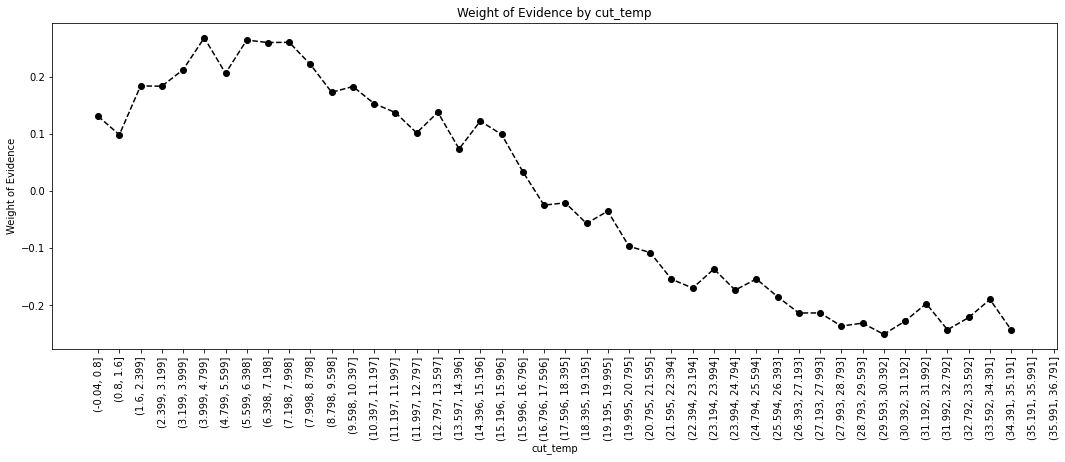

In [147]:
plot_by_woe(temp, 90)

In [148]:
cuts=[1.4,
      [1.41,3.5],
     [3.51,7.7],
     [7.71,10.5],
     [10.51,16.1],
     [16.11,20.3],
     [20.31,21.7],
     [21.71,22.4],
     [22.41,35],
     35.01]

temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 1 )

# check
Counter(temp_list)

Counter({'22.4-35': 119439,
         '<=1.4': 3751,
         '7.7-10.5': 44862,
         '16.1-20.3': 87832,
         '10.5-16.1': 116321,
         '3.5-7.7': 42091,
         '20.3-21.7': 26437,
         '1.4-3.5': 9669,
         '21.7-22.4': 12292,
         '>=35.0': 3591})

In [149]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

In [150]:
#mths_since_last_record
col = 'mths_since_last_record'
len(X_train[col].unique())

124

In [151]:
X_train['cut_temp'] = pd.cut(X_train[col], 50)
temp = WoE_IV_continuous(X_train,'cut_temp', Y_train)
temp

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,cut_temp,n_obs,prob_good,propo_total,n_good,n_bad,propo_good,propo_bad,WoE,diff_propo_good,diff_WoE,IV_sub,IV
0,"(-0.129, 2.58]",1050,0.761905,0.020970,800.0,250.0,0.017866,0.047214,-0.971781,NaN,NaN,2.851986e-02,inf
1,"(2.58, 5.16]",126,0.904762,0.002516,114.0,12.0,0.002546,0.002266,0.116360,0.015320,1.088141,3.254140e-05,inf
2,"(5.16, 7.74]",118,0.923729,0.002357,109.0,9.0,0.002434,0.001700,0.359192,0.000112,0.242832,2.638510e-04,inf
3,"(7.74, 10.32]",241,0.912863,0.004813,220.0,21.0,0.004913,0.003966,0.214173,0.002479,0.145018,2.028718e-04,inf
4,"(10.32, 12.9]",192,0.901042,0.003834,173.0,19.0,0.003864,0.003588,0.073921,0.001050,0.140252,2.035043e-05,inf
5,"(12.9, 15.48]",308,0.905844,0.006151,279.0,29.0,0.006231,0.005477,0.128984,0.002367,0.055063,9.725579e-05,inf
6,"(15.48, 18.06]",340,0.917647,0.006790,312.0,28.0,0.006968,0.005288,0.275867,0.000737,0.146883,4.634167e-04,inf
7,"(18.06, 20.64]",247,0.923077,0.004933,228.0,19.0,0.005092,0.003588,0.349975,0.001876,0.074108,5.262256e-04,inf
8,"(20.64, 23.22]",447,0.912752,0.008927,408.0,39.0,0.009112,0.007365,0.212774,0.004020,0.137201,3.715844e-04,inf
9,"(23.22, 25.8]",337,0.905045,0.006730,305.0,32.0,0.006812,0.006043,0.119644,0.002300,0.093130,9.189820e-05,inf


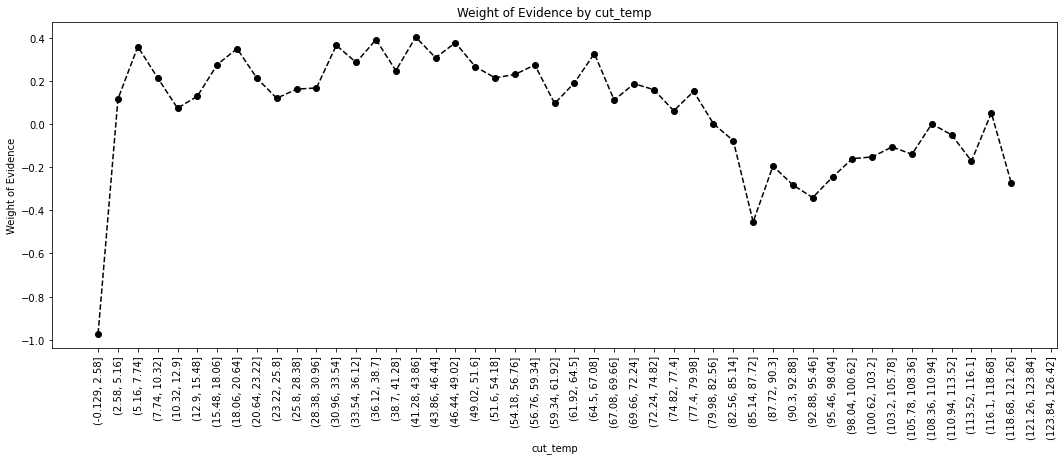

In [152]:
plot_by_woe(temp, 90)

In [153]:
cuts=[[0,2],
      [3,20],
     [21,31],
     [32,80],
     [81,86],
     86.01]
temp_list, train_temp_list = continuous_cutter(data, X_train, cuts = cuts, col= col, level = 1, dec = 0 )

# check
Counter(temp_list)

Counter({'Missing': 403647,
         '>=86.0': 25670,
         '32-80': 28003,
         '81-86': 3155,
         '21-31': 2496,
         '3-20': 1984,
         '0-2': 1330})

In [154]:
data[col+'_numeric'] = data[col]
data[col]= temp_list
X_train[col]= train_temp_list
use = True

# record col, cat, ref
if use == True:
    ref = ref_cat_min_WoE(X_train, col , Y_train)
    col_picked.append(col)
    pd_feature.append(ref[2])
    ref_cat.append(ref[0])
    lgd_ead_feature.append([col+'_numeric'])

# Create dummies, Split train/test again

In [155]:
# get dummies
data_dummies = pd.concat(
    [pd.get_dummies(data[c], prefix = c, prefix_sep = col_sep) for c in col_picked],
    axis = 1)
    
# concat data
data = pd.concat([data, data_dummies], axis = 1)

In [156]:
data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [157]:
train = data.loc[train_idx,]
test = data.loc[test_idx,]

# output csv

In [158]:
#dummies name
pd_flat = [item for sublist in pd_feature for item in sublist]
pd_feature = pd.DataFrame(columns = ['feature'], data = pd_flat)

# refference categories
reference_categories = pd.DataFrame(columns = ['reference'], data = ref_cat)

#column use (parent column)
col_picked = pd.DataFrame(columns = ['column'], data =col_picked)

#features for lgd ead
lgd_ead_feature_flat = [item for sublist in lgd_ead_feature for item in sublist]
lgd_ead_feature = pd.DataFrame(columns = ['feature'], data =lgd_ead_feature_flat)
train_idx = pd.DataFrame(columns=['train_index'], data = train_idx)
test_idx = pd.DataFrame(columns=['test_index'], data = test_idx)

In [159]:
train.to_csv('processed_data/train_set.csv')
test.to_csv('processed_data/test_set.csv')
data.to_csv('processed_data/data_processed.csv')
lgd_ead_feature.to_csv('processed_data/lgd_ead_feature.csv')
pd_feature.to_csv('processed_data/pd_feature.csv')
reference_categories.to_csv('processed_data/reference_categories.csv')
col_picked.to_csv('processed_data/dummy_parent_name.csv')
dependent_name.to_csv('processed_data/dependent_name.csv')
train_idx.to_csv('processed_data/train_idx.csv')
test_idx.to_csv('processed_data/test_idx.csv')